# Project: Wrangling and Analyze Data

## Table of Content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#datagathering">Data Gathering</a></li>
<li><a href="#assessingdata">Assessing Data</a></li>
<li><a href="#cleaningdata">Cleaning Data</a></li>
<li><a href="#storingdata">Storing Data</a></li>
<li><a href="#analyzing&visualizingdata">Analyzing and Visualizing Data</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, the dataset 'WeRateDogs' will be wrangled (and as well analyzed and visualized). 
WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The account has over four (4) million followers and has received international media coverage.
Because real-world data rarely comes clean, data will thus be gathered (based on WeRateDogs) from a variety of sources with the end goal of analyzing and visualizing the collated information afterwards.

The Wrangling will follow this format:
1. Data Gathering
2. Assessing the Data
3. Cleaning the Data

<a id='datagathering'></a>
## Data Gathering
Here, the three pieces of data for this project:
1. The WeRateDogs Twitter archive (twitter_archive_enhanced.csv)
2. The tweet image predictions (image_predictions.tsv)
3. Additional data from the Twitter API (each tweet's retweet count and favorite ('like') count at the minimum)

will be gathered using different methods.

### 1.0    WeRateDogs Twitter Archive

In [192]:
# Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [193]:
# Loading dataset
twitter_archive_data = pd.read_csv('twitter-archive-enhanced.csv')

In [194]:
# Carrying out checks
twitter_archive_data.head(5)        # Prints the first 5 rows

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2.0 The Tweet Image Predictions

In [195]:
# Import Statements
from bs4 import BeautifulSoup
import requests
import os

In [196]:
# Using Requests library to download the tweet image prediction (image_predictions.tsv)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
data_request = requests.get(url)
soup = BeautifulSoup(data_request.text, 'html.parser')   # Aided by using BeautifulSoup

open('image-predictions.tsv', 'wb').write(data_request.content)  # Opens file and writes content to it
soup                   # Show content of the file

tweet_id	jpg_url	img_num	p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog
666020888022790149	https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg	1	Welsh_springer_spaniel	0.465074	True	collie	0.156665	True	Shetland_sheepdog	0.0614285	True
666029285002620928	https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg	1	redbone	0.506826	True	miniature_pinscher	0.07419169999999999	True	Rhodesian_ridgeback	0.07201	True
666033412701032449	https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg	1	German_shepherd	0.596461	True	malinois	0.13858399999999998	True	bloodhound	0.11619700000000001	True
666044226329800704	https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg	1	Rhodesian_ridgeback	0.408143	True	redbone	0.360687	True	miniature_pinscher	0.222752	True
666049248165822465	https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg	1	miniature_pinscher	0.560311	True	Rottweiler	0.243682	True	Doberman	0.154629	True
666050758794694657	https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg	1	Bernese_mountain_dog	0.651137	True	English_spri

In [197]:
# Loading and displaying dataset
image_predictions = pd.read_table('image-predictions.tsv', sep='\t')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### 3.0  Additional data from the Twitter API
(each tweet's retweet count and favorite ('like') count at the minimum)

In [198]:
# With Tweepy already installed
import tweepy as tw    # Import statement

# Key, secrets and token for the Twitter API data access

consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tw.API(auth, wait_on_rate_limit=True)

In [199]:
# Storing the ids of the tweet to a dataframe ('twitter_archive_data')
ids_of_tweet = twitter_archive_data.tweet_id.values

In [200]:
# Determing the number of items to be returned
len(ids_of_tweet)

2356

In [201]:
# Using Tweepy library to query additional data through the Twitter API (tweet_json.txt) - Single query check
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth)

tweet = api.get_status('892420643555336193')
print(tweet.text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU


In [202]:
# Import statements
import json
from timeit import default_timer as timer

In [69]:
# "PLEASE DO NOT RUN THIS CELL [BECAUSE 'Key, secrets and token for the Twitter API data access' WAS REMOVED]" 

# Using Tweepy library to query additional data through the Twitter API (tweet_json.txt)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive

count = 0
fails_dict = {}
start = timer()

# Saves each tweet to a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit 
    for tweet_id in ids_of_tweet:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended',
                                  wait_on_rate_limit = True, 
                                  wait_on_rate_limit_notify = True)
            
            print('success')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tw.errors.TweepyException as e:
            print('fail')
            fails_dict[tweet_id] = e
            pass
        
        
end = timer()
print('Entire query twitter data take {} min'.format(
        (end - start)/60))
print(fails_dict)

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


1: 892420643555336193


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2: 892177421306343426


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
3: 891815181378084864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
4: 891689557279858688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
5: 891327558926688256


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
6: 891087950875897856


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
7: 890971913173991426


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
8: 890729181411237888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
9: 890609185150312448


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
10: 890240255349198849


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
11: 890006608113172480


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
12: 889880896479866881


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
13: 889665388333682689


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
14: 889638837579907072


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
15: 889531135344209921


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
16: 889278841981685760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
17: 888917238123831296


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
18: 888804989199671297


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
19: 888554962724278272


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
20: 888202515573088257


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
21: 888078434458587136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
22: 887705289381826560


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
23: 887517139158093824


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
24: 887473957103951883


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
25: 887343217045368832


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
26: 887101392804085760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
27: 886983233522544640


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
28: 886736880519319552


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
29: 886680336477933568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
30: 886366144734445568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
31: 886267009285017600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
32: 886258384151887873


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
33: 886054160059072513


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
34: 885984800019947520


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
35: 885528943205470208


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
36: 885518971528720385


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
37: 885311592912609280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
38: 885167619883638784


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
39: 884925521741709313


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
40: 884876753390489601


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
41: 884562892145688576


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
42: 884441805382717440


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
43: 884247878851493888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
44: 884162670584377345


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
45: 883838122936631299


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
46: 883482846933004288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
47: 883360690899218434


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
48: 883117836046086144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
49: 882992080364220416


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
50: 882762694511734784


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
51: 882627270321602560


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
52: 882268110199369728


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
53: 882045870035918850


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
54: 881906580714921986


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
55: 881666595344535552


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
56: 881633300179243008


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
57: 881536004380872706


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
58: 881268444196462592


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
59: 880935762899988482


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
60: 880872448815771648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
61: 880465832366813184


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
62: 880221127280381952


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
63: 880095782870896641


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
64: 879862464715927552


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
65: 879674319642796034


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
66: 879492040517615616


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
67: 879415818425184262


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
68: 879376492567855104


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
69: 879130579576475649


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
70: 879050749262655488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
71: 879008229531029506


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
72: 878776093423087618


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
73: 878604707211726852


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
74: 878404777348136964


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
75: 878316110768087041


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
76: 878281511006478336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
77: 878057613040115712


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
78: 877736472329191424


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
79: 877611172832227328


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
80: 877556246731214848


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
81: 877316821321428993


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
82: 877201837425926144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
83: 876838120628539392


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
84: 876537666061221889


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
85: 876484053909872640


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
86: 876120275196170240


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
87: 875747767867523072


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
88: 875144289856114688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
89: 875097192612077568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
90: 875021211251597312


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
91: 874680097055178752


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
92: 874434818259525634


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
93: 874296783580663808


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
94: 874057562936811520


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
95: 874012996292530176


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
96: 873697596434513921


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
97: 873580283840344065


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
98: 873337748698140672


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
99: 873213775632977920


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
100: 872967104147763200


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
101: 872820683541237760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
102: 872668790621863937


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
103: 872620804844003328


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
104: 872486979161796608


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
105: 872261713294495745


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
106: 872122724285648897


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
107: 871879754684805121


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
108: 871762521631449091


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
109: 871515927908634625


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
110: 871166179821445120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
111: 871102520638267392


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
112: 871032628920680449


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
113: 870804317367881728


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
114: 870726314365509632


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
115: 870656317836468226


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
116: 870374049280663552


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
117: 870308999962521604


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
118: 870063196459192321


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
119: 869988702071779329


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
120: 869772420881756160


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
121: 869702957897576449


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
122: 869596645499047938


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
123: 869227993411051520


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
124: 868880397819494401


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
125: 868639477480148993


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
126: 868622495443632128


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
127: 868552278524837888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
128: 867900495410671616


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
129: 867774946302451713


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
130: 867421006826221569


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
131: 867072653475098625


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
132: 867051520902168576


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
133: 866816280283807744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
134: 866720684873056260


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
135: 866686824827068416


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
136: 866450705531457537


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
137: 866334964761202691


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
138: 866094527597207552


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
139: 865718153858494464


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
140: 865359393868664832


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
141: 865006731092295680


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
142: 864873206498414592


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
143: 864279568663928832


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
144: 864197398364647424


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
145: 863907417377173506


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
146: 863553081350529029


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
147: 863471782782697472


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
148: 863432100342583297


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
149: 863427515083354112


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
150: 863079547188785154


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
151: 863062471531167744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
152: 862831371563274240


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
153: 862722525377298433


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
154: 862457590147678208


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
155: 862096992088072192


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
156: 861769973181624320


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
157: 861383897657036800


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
158: 861288531465048066


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
159: 861005113778896900


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
160: 860981674716409858


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
161: 860924035999428608


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
162: 860563773140209665


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
163: 860524505164394496


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
164: 860276583193509888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
165: 860184849394610176


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
166: 860177593139703809


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
167: 859924526012018688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
168: 859851578198683649


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
169: 859607811541651456


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
170: 859196978902773760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
171: 859074603037188101


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
172: 858860390427611136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
173: 858843525470990336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
174: 858471635011153920


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
175: 858107933456039936


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
176: 857989990357356544


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
177: 857746408056729600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
178: 857393404942143489


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
179: 857263160327368704


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
180: 857214891891077121


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
181: 857062103051644929


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
182: 857029823797047296


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
183: 856602993587888130


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
184: 856543823941562368


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
185: 856526610513747968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
186: 856330835276025856


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
187: 856288084350160898


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
188: 856282028240666624


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
189: 855862651834028034


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
190: 855860136149123072


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
191: 855857698524602368


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
192: 855851453814013952


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
193: 855818117272018944


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
194: 855459453768019968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
195: 855245323840757760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
196: 855138241867124737


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
197: 854732716440526848


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
198: 854482394044301312


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
199: 854365224396361728


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
200: 854120357044912130


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
201: 854010172552949760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
202: 853760880890318849


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
203: 853639147608842240


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
204: 853299958564483072


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
205: 852936405516943360


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
206: 852912242202992640


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
207: 852672615818899456


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
208: 852553447878664193


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
209: 852311364735569921


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
210: 852226086759018497


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
211: 852189679701164033


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
212: 851953902622658560


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
213: 851861385021730816


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
214: 851591660324737024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
215: 851464819735769094


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
216: 851224888060895234


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
217: 850753642995093505


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
218: 850380195714523136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
219: 850333567704068097


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
220: 850145622816686080


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
221: 850019790995546112


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
222: 849776966551130114


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
223: 849668094696017920


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
224: 849412302885593088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
225: 849336543269576704


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
226: 849051919805034497


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
227: 848690551926992896


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
228: 848324959059550208


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
229: 848213670039564288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
230: 848212111729840128


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
231: 847978865427394560


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
232: 847971574464610304


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
233: 847962785489326080


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
234: 847842811428974592


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
235: 847617282490613760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
236: 847606175596138505


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
237: 847251039262605312


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
238: 847157206088847362


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
239: 847116187444137987


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
240: 846874817362120707


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
241: 846514051647705089


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
242: 846505985330044928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
243: 846153765933735936


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
244: 846139713627017216


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
245: 846042936437604353


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
246: 845812042753855489


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
247: 845677943972139009


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
248: 845459076796616705


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
249: 845397057150107648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
250: 845306882940190720


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
251: 845098359547420673


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
252: 844979544864018432


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
253: 844973813909606400


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
254: 844704788403113984


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
255: 844580511645339650


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
256: 844223788422217728


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
257: 843981021012017153


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
258: 843856843873095681


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
259: 843604394117681152


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
260: 843235543001513987


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
261: 842892208864923648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
262: 842846295480000512


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
263: 842765311967449089


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
264: 842535590457499648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
265: 842163532590374912


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
266: 842115215311396866


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
267: 841833993020538882


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
268: 841680585030541313


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
269: 841439858740625411


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
270: 841320156043304961


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
271: 841314665196081154


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
272: 841077006473256960


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
273: 840761248237133825


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
274: 840728873075638272


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
275: 840698636975636481


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
276: 840696689258311684


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
277: 840632337062862849


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
278: 840370681858686976


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
279: 840268004936019968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
280: 839990271299457024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
281: 839549326359670784


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
282: 839290600511926273


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
283: 839239871831150596


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
284: 838952994649550848


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
285: 838921590096166913


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
286: 838916489579200512


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
287: 838831947270979586


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
288: 838561493054533637


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
289: 838476387338051585


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
290: 838201503651401729


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
291: 838150277551247360


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
292: 838085839343206401


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
293: 838083903487373313


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
294: 837820167694528512


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
295: 837482249356513284


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
296: 837471256429613056


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
297: 837366284874571778


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
298: 837110210464448512


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
299: 837012587749474308


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
300: 836989968035819520


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
301: 836753516572119041


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
302: 836677758902222849


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
303: 836648853927522308


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
304: 836397794269200385


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
305: 836380477523124226


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
306: 836260088725786625


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
307: 836001077879255040


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
308: 835685285446955009


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
309: 835574547218894849


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
310: 835536468978302976


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
311: 835309094223372289


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
312: 835297930240217089


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
313: 835264098648616962


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
314: 835246439529840640


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
315: 835172783151792128


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
316: 835152434251116546


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
317: 834931633769889797


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
318: 834786237630337024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
319: 834574053763584002


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
320: 834477809192075265


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
321: 834458053273591808


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
322: 834209720923721728


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
323: 834167344700198914


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
324: 834089966724603904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
325: 834086379323871233


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
326: 833863086058651648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
327: 833826103416520705


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
328: 833732339549220864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
329: 833722901757046785


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
330: 833479644947025920


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
331: 833124694597443584


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
332: 832998151111966721


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
333: 832769181346996225


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
334: 832757312314028032


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
335: 832682457690300417


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
336: 832645525019123713


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
337: 832636094638288896


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
338: 832397543355072512


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
339: 832369877331693569


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
340: 832273440279240704


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
341: 832215909146226688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
342: 832215726631055365


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
343: 832088576586297345


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
344: 832040443403784192


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
345: 832032802820481025


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
346: 831939777352105988


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
347: 831926988323639298


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
348: 831911600680497154


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
349: 831670449226514432


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
350: 831650051525054464


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
351: 831552930092285952


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
352: 831322785565769729


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
353: 831315979191906304


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
354: 831309418084069378


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
355: 831262627380748289


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
356: 830956169170665475


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
357: 830583320585068544


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
358: 830173239259324417


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
359: 830097400375152640


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
360: 829878982036299777


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
361: 829861396166877184


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
362: 829501995190984704


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
363: 829449946868879360


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
364: 829374341691346946


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
365: 829141528400556032


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
366: 829011960981237760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
367: 828801551087042563


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
368: 828770345708580865


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
369: 828708714936930305


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
370: 828650029636317184


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
371: 828409743546925057


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
372: 828408677031882754


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
373: 828381636999917570


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
374: 828376505180889089


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
375: 828372645993398273


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
376: 828361771580813312


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
377: 828046555563323392


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
378: 828011680017821696


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
379: 827933404142436356


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
380: 827653905312006145


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
381: 827600520311402496


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
382: 827324948884643840


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
383: 827228250799742977


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
384: 827199976799354881


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
385: 826958653328592898


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
386: 826848821049180160


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
387: 826615380357632002


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
388: 826598799820865537


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
389: 826598365270007810


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
390: 826476773533745153


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
391: 826240494070030336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
392: 826204788643753985


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
393: 826115272272650244


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
394: 825876512159186944


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
395: 825829644528148480


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
396: 825535076884762624


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
397: 825147591692263424


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
398: 825120256414846976


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
399: 825026590719483904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
400: 824796380199809024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
401: 824775126675836928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
402: 824663926340194305


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
403: 824325613288833024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
404: 824297048279236611


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
405: 824025158776213504


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
406: 823939628516474880


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
407: 823719002937630720


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
408: 823699002998870016


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
409: 823581115634085888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
410: 823333489516937216


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
411: 823322678127919110


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
412: 823269594223824897


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
413: 822975315408461824


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
414: 822872901745569793


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
415: 822859134160621569


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
416: 822647212903690241


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
417: 822610361945911296


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
418: 822489057087389700


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
419: 822462944365645825


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
420: 822244816520155136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
421: 822163064745328640


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
422: 821886076407029760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
423: 821813639212650496


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
424: 821765923262631936


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
425: 821522889702862852


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
426: 821421320206483457


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
427: 821407182352777218


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
428: 821153421864615936


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
429: 821149554670182400


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
430: 821107785811234820


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
431: 821044531881721856


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
432: 820837357901512704


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
433: 820749716845686786


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
434: 820690176645140481


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
435: 820494788566847489


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
436: 820446719150292993


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
437: 820314633777061888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
438: 820078625395449857


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
439: 820013781606658049


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
440: 819952236453363712


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
441: 819924195358416896


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
442: 819711362133872643


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
443: 819588359383371776


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
444: 819347104292290561


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
445: 819238181065359361


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
446: 819227688460238848


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
447: 819015337530290176


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
448: 819015331746349057


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
449: 819006400881917954


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
450: 819004803107983360


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
451: 818646164899774465


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
452: 818627210458333184


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
453: 818614493328580609


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
454: 818588835076603904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
455: 818536468981415936


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
456: 818307523543449600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
457: 818259473185828864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
458: 818145370475810820


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
459: 817908911860748288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
460: 817827839487737858


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
461: 817777686764523521


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
462: 817536400337801217


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
463: 817502432452313088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
464: 817423860136083457


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
465: 817415592588222464


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
466: 817181837579653120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
467: 817171292965273600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
468: 817120970343411712


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
469: 817056546584727552


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
470: 816829038950027264


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
471: 816816676327063552


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
472: 816697700272001025


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
473: 816450570814898180


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
474: 816336735214911488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
475: 816091915477250048


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
476: 816062466425819140


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
477: 816014286006976512


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
478: 815990720817401858


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
479: 815966073409433600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
480: 815745968457060357


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
481: 815736392542261248


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
482: 815639385530101762


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
483: 815390420867969024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
484: 814986499976527872


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
485: 814638523311648768


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
486: 814578408554463233


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
487: 814530161257443328


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
488: 814153002265309185


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
489: 813944609378369540


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
490: 813910438903693312


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
491: 813812741911748608


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
492: 813800681631023104


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
493: 813217897535406080


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
494: 813202720496779264


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
495: 813187593374461952


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
496: 813172488309972993


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
497: 813157409116065792


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
498: 813142292504645637


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
499: 813130366689148928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
500: 813127251579564032


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
501: 813112105746448384


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
502: 813096984823349248


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
503: 813081950185472002


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
504: 813066809284972545


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
505: 813051746834595840


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
506: 812781120811126785


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
507: 812747805718642688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
508: 812709060537683968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
509: 812503143955202048


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
510: 812466873996607488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
511: 812372279581671427


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
512: 811985624773361665


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
513: 811744202451197953


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
514: 811647686436880384


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
515: 811627233043480576


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
516: 811386762094317568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
517: 810984652412424192


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
518: 810896069567610880


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
519: 810657578271330305


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
520: 810284430598270976


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
521: 810254108431155201


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
522: 809920764300447744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
523: 809808892968534016


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
524: 809448704142938112


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
525: 809220051211603969


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
526: 809084759137812480


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
527: 808838249661788160


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
528: 808733504066486276


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
529: 808501579447930884


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
530: 808344865868283904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
531: 808134635716833280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
532: 808106460588765185


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
533: 808001312164028416


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
534: 807621403335917568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
535: 807106840509214720


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
536: 807059379405148160


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
537: 807010152071229440


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
538: 806629075125202948


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
539: 806620845233815552


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
540: 806576416489959424


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
541: 806542213899489280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
542: 806242860592926720


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
543: 806219024703037440


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
544: 805958939288408065


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
545: 805932879469572096


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
546: 805826884734976000


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
547: 805823200554876929


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
548: 805520635690676224


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
549: 805487436403003392


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
550: 805207613751304193


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
551: 804738756058218496


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
552: 804475857670639616


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
553: 804413760345620481


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
554: 804026241225523202


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
555: 803773340896923648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
556: 803692223237865472


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
557: 803638050916102144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
558: 803380650405482500


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
559: 803321560782307329


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
560: 803276597545603072


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
561: 802952499103731712


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
562: 802624713319034886


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
563: 802600418706604034


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
564: 802572683846291456


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
565: 802323869084381190


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
566: 802265048156610565


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
567: 802247111496568832


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
568: 802239329049477120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
569: 802185808107208704


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
570: 801958328846974976


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
571: 801854953262350336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
572: 801538201127157760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
573: 801285448605831168


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
574: 801167903437357056


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
575: 801127390143516673


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
576: 801115127852503040


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
577: 800859414831898624


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
578: 800855607700029440


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
579: 800751577355128832


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
580: 800513324630806528


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
581: 800459316964663297


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
582: 800443802682937345


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
583: 800388270626521089


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
584: 800188575492947969


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
585: 800141422401830912


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
586: 800018252395122689


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
587: 799774291445383169


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
588: 799757965289017345


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
589: 799422933579902976


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
590: 799308762079035393


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
591: 799297110730567681


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
592: 799063482566066176


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
593: 798933969379225600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
594: 798925684722855936


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
595: 798705661114773508


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
596: 798701998996647937


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
597: 798697898615730177


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
598: 798694562394996736


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
599: 798686750113755136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
600: 798682547630837760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
601: 798673117451325440


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
602: 798665375516884993


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
603: 798644042770751489


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
604: 798628517273620480


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
605: 798585098161549313


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
606: 798576900688019456


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
607: 798340744599797760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
608: 798209839306514432


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
609: 797971864723324932


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
610: 797545162159308800


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
611: 797236660651966464


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
612: 797165961484890113


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
613: 796904159865868288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
614: 796865951799083009


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
615: 796759840936919040


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
616: 796563435802726400


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
617: 796484825502875648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
618: 796387464403357696


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
619: 796177847564038144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
620: 796149749086875649


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
621: 796125600683540480


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
622: 796116448414461957


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
623: 796080075804475393


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
624: 796031486298386433


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
625: 795464331001561088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
626: 795400264262053889


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
627: 795076730285391872


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
628: 794983741416415232


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
629: 794926597468000259


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
630: 794355576146903043


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
631: 794332329137291264


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
632: 794205286408003585


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
633: 793962221541933056


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
634: 793845145112371200


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
635: 793614319594401792


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
636: 793601777308463104


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
637: 793500921481273345


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
638: 793286476301799424


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
639: 793271401113350145


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
640: 793256262322548741


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
641: 793241302385262592


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
642: 793226087023144960


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
643: 793210959003287553


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
644: 793195938047070209


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
645: 793180763617361921


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
646: 793165685325201412


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
647: 793150605191548928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
648: 793135492858580992


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
649: 793120401413079041


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
650: 792913359805018113


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
651: 792883833364439040


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
652: 792773781206999040


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
653: 792394556390137856


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
654: 792050063153438720


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
655: 791821351946420224


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
656: 791784077045166082


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
657: 791780927877898241


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
658: 791774931465953280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
659: 791672322847637504


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
660: 791406955684368384


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
661: 791312159183634433


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
662: 791026214425268224


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
663: 790987426131050500


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
664: 790946055508652032


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
665: 790723298204217344


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
666: 790698755171364864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
667: 790581949425475584


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
668: 790337589677002753


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
669: 790277117346975746


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
670: 790227638568808452


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
671: 789986466051088384


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
672: 789960241177853952


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
673: 789903600034189313


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
674: 789628658055020548


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
675: 789599242079838210


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
676: 789530877013393408


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
677: 789314372632018944


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
678: 789280767834746880


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
679: 789268448748703744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
680: 789137962068021249


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
681: 788908386943430656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
682: 788765914992902144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
683: 788552643979468800


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
684: 788412144018661376


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
685: 788178268662984705


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
686: 788150585577050112


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
687: 788070120937619456


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
688: 788039637453406209


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
689: 787810552592695296


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
690: 787717603741622272


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
691: 787397959788929025


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
692: 787322443945877504


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
693: 787111942498508800


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
694: 786963064373534720


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
695: 786729988674449408


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
696: 786709082849828864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
697: 786664955043049472


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
698: 786595970293370880


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
699: 786363235746385920


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
700: 786286427768250368


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
701: 786233965241827333


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
702: 786051337297522688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
703: 786036967502913536


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
704: 785927819176054784


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
705: 785872687017132033


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
706: 785639753186217984


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
707: 785533386513321988


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
708: 785515384317313025


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
709: 785264754247995392


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
710: 785170936622350336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
711: 784826020293709826


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
712: 784517518371221505


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
713: 784431430411685888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
714: 784183165795655680


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
715: 784057939640352768


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
716: 783839966405230592


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
717: 783821107061198850


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
718: 783695101801398276


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
719: 783466772167098368


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
720: 783391753726550016


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
721: 783347506784731136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
722: 783334639985389568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
723: 783085703974514689


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
724: 782969140009107456


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
725: 782747134529531904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
726: 782722598790725632


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
727: 782598640137187329


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
728: 782305867769217024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
729: 782021823840026624


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
730: 781955203444699136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
731: 781661882474196992


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
732: 781655249211752448


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
733: 781524693396357120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
734: 781308096455073793


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
735: 781251288990355457


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
736: 781163403222056960


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
737: 780931614150983680


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
738: 780858289093574656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
739: 780800785462489090


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
740: 780601303617732608


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
741: 780543529827336192


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
742: 780496263422808064


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
743: 780476555013349377


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
744: 780459368902959104


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
745: 780192070812196864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
746: 780092040432480260


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
747: 780074436359819264


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
748: 779834332596887552


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
749: 779377524342161408


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
750: 779124354206535695


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
751: 779123168116150273


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
752: 779056095788752897


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
753: 778990705243029504


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
754: 778774459159379968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
755: 778764940568104960


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
756: 778748913645780993


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
757: 778650543019483137


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
758: 778624900596654080


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
759: 778408200802557953


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
760: 778396591732486144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
761: 778383385161035776


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
762: 778286810187399168


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
763: 778039087836069888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
764: 778027034220126208


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
765: 777953400541634568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
766: 777885040357281792


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
767: 777684233540206592


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
768: 777641927919427584


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
769: 777621514455814149


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
770: 777189768882946048


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
771: 776819012571455488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
772: 776813020089548800


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
773: 776477788987613185


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
774: 776249906839351296


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
775: 776218204058357768


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
776: 776201521193218049


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
777: 776113305656188928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
778: 776088319444877312


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
779: 775898661951791106


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
780: 775842724423557120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
781: 775733305207554048


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
782: 775729183532220416


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
783: 775364825476165632


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
784: 775350846108426240


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
785: 775096608509886464


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
786: 775085132600442880


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
787: 774757898236878852


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
788: 774639387460112384


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
789: 774314403806253056


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
790: 773985732834758656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
791: 773922284943896577


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
792: 773704687002451968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
793: 773670353721753600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
794: 773547596996571136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
795: 773336787167145985


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
796: 773308824254029826


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
797: 773247561583001600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
798: 773191612633579521


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
799: 772877495989305348


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
800: 772826264096874500


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
801: 772615324260794368


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
802: 772581559778025472


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
803: 772193107915964416


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
804: 772152991789019136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
805: 772117678702071809


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
806: 772114945936949249


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
807: 772102971039580160


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
808: 771908950375665664


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
809: 771770456517009408


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
810: 771500966810099713


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
811: 771380798096281600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
812: 771171053431250945


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
813: 771136648247640064


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
814: 771102124360998913


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
815: 771014301343748096


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
816: 771004394259247104


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
817: 770787852854652928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
818: 770772759874076672


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
819: 770743923962707968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
820: 770655142660169732


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
821: 770414278348247044


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
822: 770293558247038976


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
823: 770093767776997377


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
824: 770069151037685760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
825: 769940425801170949


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
826: 769695466921623552


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
827: 769335591808995329


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
828: 769212283578875904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
829: 768970937022709760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
830: 768909767477751808


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
831: 768855141948723200


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
832: 768609597686943744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
833: 768596291618299904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
834: 768554158521745409


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
835: 768473857036525572


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
836: 768193404517830656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
837: 767884188863397888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
838: 767754930266464257


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
839: 767500508068192258


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
840: 767191397493538821


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
841: 767122157629476866


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
842: 766864461642756096


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
843: 766793450729734144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
844: 766714921925144576


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
845: 766693177336135680


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
846: 766423258543644672


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
847: 766313316352462849


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
848: 766078092750233600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
849: 766069199026450432


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
850: 766008592277377025


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
851: 765719909049503744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
852: 765669560888528897


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
853: 765395769549590528


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
854: 765371061932261376


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
855: 765222098633691136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
856: 764857477905154048


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
857: 764259802650378240


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
858: 763956972077010945


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
859: 763837565564780549


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
860: 763183847194451968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
861: 763167063695355904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
862: 763103485927849985


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
863: 762699858130116608


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
864: 762471784394268675


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
865: 762464539388485633


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
866: 762316489655476224


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
867: 762035686371364864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
868: 761976711479193600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
869: 761750502866649088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
870: 761745352076779520


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
871: 761672994376806400


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
872: 761599872357261312


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
873: 761371037149827077


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
874: 761334018830917632


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
875: 761292947749015552


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
876: 761227390836215808


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
877: 761004547850530816


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
878: 760893934457552897


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
879: 760656994973933572


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
880: 760641137271070720


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
881: 760539183865880579


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
882: 760521673607086080


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
883: 760290219849637889


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
884: 760252756032651264


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
885: 760190180481531904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
886: 760153949710192640


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
887: 759943073749200896


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
888: 759923798737051648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
889: 759846353224826880


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
890: 759793422261743616


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
891: 759566828574212096


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
892: 759557299618865152


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
893: 759447681597108224


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
894: 759446261539934208


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
895: 759197388317847553


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
896: 759159934323924993


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
897: 759099523532779520


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
898: 759047813560868866


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
899: 758854675097526272


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
900: 758828659922702336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
901: 758740312047005698


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
902: 758474966123810816


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
903: 758467244762497024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
904: 758405701903519748


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
905: 758355060040593408


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
906: 758099635764359168


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
907: 758041019896193024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
908: 757741869644341248


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
909: 757729163776290825


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
910: 757725642876129280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
911: 757611664640446465


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
912: 757597904299253760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
913: 757596066325864448


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
914: 757400162377592832


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
915: 757393109802180609


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
916: 757354760399941633


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
917: 756998049151549440


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
918: 756939218950160384


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
919: 756651752796094464


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
920: 756526248105566208


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
921: 756303284449767430


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
922: 756288534030475264


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
923: 756275833623502848


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
924: 755955933503782912


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
925: 755206590534418437


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
926: 755110668769038337


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
927: 754874841593970688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
928: 754856583969079297


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
929: 754747087846248448


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
930: 754482103782404096


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
931: 754449512966619136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
932: 754120377874386944


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
933: 754011816964026368


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
934: 753655901052166144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
935: 753420520834629632


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
936: 753398408988139520


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
937: 753375668877008896


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
938: 753298634498793472


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
939: 753294487569522689


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
940: 753039830821511168


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
941: 753026973505581056


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
942: 752932432744185856


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
943: 752917284578922496


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
944: 752701944171524096


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
945: 752682090207055872


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
946: 752660715232722944


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
947: 752568224206688256


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
948: 752519690950500352


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
949: 752334515931054080


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
950: 752309394570878976


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
951: 752173152931807232


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
952: 751950017322246144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
953: 751937170840121344


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
954: 751830394383790080


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
955: 751793661361422336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
956: 751598357617971201


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
957: 751583847268179968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
958: 751538714308972544


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
959: 751456908746354688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
960: 751251247299190784


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
961: 751205363882532864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
962: 751132876104687617


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
963: 750868782890057730


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
964: 750719632563142656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
965: 750506206503038976


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
966: 750429297815552001


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
967: 750383411068534784


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
968: 750381685133418496


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
969: 750147208377409536


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
970: 750132105863102464


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
971: 750117059602808832


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
972: 750101899009982464


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
973: 750086836815486976


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
974: 750071704093859840


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
975: 750056684286914561


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
976: 750041628174217216


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
977: 750026558547456000


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
978: 750011400160841729


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
979: 749996283729883136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
980: 749981277374128128


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
981: 749774190421639168


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
982: 749417653287129088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
983: 749403093750648834


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
984: 749395845976588288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
985: 749317047558017024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
986: 749075273010798592


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
987: 749064354620928000


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
988: 749036806121881602


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
989: 748977405889503236


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
990: 748932637671223296


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
991: 748705597323898880


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
992: 748699167502000129


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
993: 748692773788876800


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
994: 748575535303884801


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
995: 748568946752774144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
996: 748346686624440324


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
997: 748337862848962560


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
998: 748324050481647620


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
999: 748307329658011649


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1000: 748220828303695873


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1001: 747963614829678593


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1002: 747933425676525569


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1003: 747885874273214464


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1004: 747844099428986880


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1005: 747816857231626240


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1006: 747651430853525504


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1007: 747648653817413632


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1008: 747600769478692864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1009: 747594051852075008


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1010: 747512671126323200


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1011: 747461612269887489


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1012: 747439450712596480


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1013: 747242308580548608


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1014: 747219827526344708


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1015: 747204161125646336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1016: 747103485104099331


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1017: 746906459439529985


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1018: 746872823977771008


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1019: 746818907684614144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1020: 746790600704425984


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1021: 746757706116112384


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1022: 746726898085036033


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1023: 746542875601690625


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1024: 746521445350707200


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1025: 746507379341139972


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1026: 746369468511756288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1027: 746131877086527488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1028: 746056683365994496


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1029: 745789745784041472


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1030: 745712589599014916


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1031: 745433870967832576


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1032: 745422732645535745


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1033: 745314880350101504


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1034: 745074613265149952


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1035: 745057283344719872


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1036: 744995568523612160


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1037: 744971049620602880


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1038: 744709971296780288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1039: 744334592493166593


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1040: 744234799360020481


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1041: 744223424764059648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1042: 743980027717509120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1043: 743895849529389061


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1044: 743835915802583040


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1045: 743609206067040256


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1046: 743595368194129920


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1047: 743545585370791937


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1048: 743510151680958465


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1049: 743253157753532416


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1050: 743222593470234624


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1051: 743210557239623680


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1052: 742534281772302336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1053: 742528092657332225


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1054: 742465774154047488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1055: 742423170473463808


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1056: 742385895052087300


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1057: 742161199639494656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1058: 742150209887731712


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1059: 741793263812808706


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1060: 741743634094141440


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1061: 741438259667034112


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1062: 741303864243200000


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1063: 741099773336379392


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1064: 741067306818797568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1065: 740995100998766593


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1066: 740711788199743490


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1067: 740699697422163968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1068: 740676976021798912


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1069: 740373189193256964


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1070: 740365076218183684


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1071: 740359016048689152


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1072: 740214038584557568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1073: 739979191639244800


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1074: 739932936087216128


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1075: 739844404073074688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1076: 739623569819336705


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1077: 739606147276148736


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1078: 739544079319588864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1079: 739485634323156992


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1080: 739238157791694849


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1081: 738891149612572673


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1082: 738885046782832640


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1083: 738883359779196928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1084: 738537504001953792


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1085: 738402415918125056


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1086: 738184450748633089


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1087: 738166403467907072


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1088: 738156290900254721


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1089: 737826014890496000


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1090: 737800304142471168


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1091: 737678689543020544


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1092: 737445876994609152


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1093: 737322739594330112


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1094: 737310737551491075


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1095: 736736130620620800


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1096: 736392552031657984


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1097: 736365877722001409


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1098: 736225175608430592


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1099: 736010884653420544


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1100: 735991953473572864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1101: 735648611367784448


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1102: 735635087207878657


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1103: 735274964362878976


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1104: 735256018284875776


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1105: 735137028879360001


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1106: 734912297295085568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1107: 734787690684657664
success


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


1108: 734776360183431168


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1109: 734559631394082816


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1110: 733828123016450049


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1111: 733822306246479872


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1112: 733482008106668032


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1113: 733460102733135873


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1114: 733109485275860992


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1115: 732732193018155009


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1116: 732726085725589504


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1117: 732585889486888962


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1118: 732375214819057664


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1119: 732005617171337216


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1120: 731285275100512256


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1121: 731156023742988288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1122: 730924654643314689


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1123: 730573383004487680


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1124: 730427201120833536


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1125: 730211855403241472


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1126: 730196704625098752


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1127: 729854734790754305


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1128: 729838605770891264


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1129: 729823566028484608


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1130: 729463711119904772


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1131: 729113531270991872


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1132: 728986383096946689


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1133: 728760639972315136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1134: 728751179681943552


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1135: 728653952833728512


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1136: 728409960103686147


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1137: 728387165835677696


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1138: 728046963732717569


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1139: 728035342121635841


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1140: 728015554473250816


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1141: 727685679342333952


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1142: 727644517743104000


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1143: 727524757080539137


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1144: 727314416056803329


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1145: 727286334147182592


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1146: 727175381690781696


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1147: 727155742655025152


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1148: 726935089318363137


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1149: 726887082820554753


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1150: 726828223124897792


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1151: 726224900189511680


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1152: 725842289046749185


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1153: 725786712245440512


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1154: 725729321944506368


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1155: 725458796924002305


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1156: 724983749226668032


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1157: 724771698126512129


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1158: 724405726123311104


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1159: 724049859469295616


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1160: 724046343203856385


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1161: 724004602748780546


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1162: 723912936180330496


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1163: 723688335806480385


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1164: 723673163800948736


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1165: 723179728551723008


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1166: 722974582966214656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1167: 722613351520608256


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1168: 721503162398597120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1169: 721001180231503872


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1170: 720785406564900865


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1171: 720775346191278080


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1172: 720415127506415616


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1173: 720389942216527872


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1174: 720340705894408192


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1175: 720059472081784833


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1176: 720043174954147842


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1177: 719991154352222208


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1178: 719704490224398336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1179: 719551379208073216


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1180: 719367763014393856


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1181: 719339463458033665


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1182: 719332531645071360


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1183: 718971898235854848


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1184: 718939241951195136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1185: 718631497683582976


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1186: 718613305783398402


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1187: 718540630683709445


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1188: 718460005985447936


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1189: 718454725339934721


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1190: 718246886998687744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1191: 718234618122661888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1192: 717841801130979328


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1193: 717790033953034240


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1194: 717537687239008257


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1195: 717428917016076293


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1196: 717421804990701568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1197: 717047459982213120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1198: 717009362452090881


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1199: 716802964044845056


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1200: 716791146589110272


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1201: 716730379797970944


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1202: 716447146686459905


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1203: 716439118184652801


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1204: 716285507865542656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1205: 716080869887381504


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1206: 715928423106027520


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1207: 715758151270801409


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1208: 715733265223708672


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1209: 715704790270025728


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1210: 715696743237730304


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1211: 715680795826982913


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1212: 715360349751484417


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1213: 715342466308784130


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1214: 715220193576927233


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1215: 715200624753819648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1216: 715009755312439296


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1217: 714982300363173890


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1218: 714962719905021952


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1219: 714957620017307648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1220: 714631576617938945


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1221: 714606013974974464


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1222: 714485234495041536


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1223: 714258258790387713


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1224: 714251586676113411


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1225: 714214115368108032


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1226: 714141408463036416


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1227: 713919462244790272


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1228: 713909862279876608


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1229: 713900603437621249


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1230: 713761197720473600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1231: 713411074226274305


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1232: 713177543487135744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1233: 713175907180089344


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1234: 712809025985978368


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1235: 712717840512598017


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1236: 712668654853337088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1237: 712438159032893441


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1238: 712309440758808576


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1239: 712097430750289920


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1240: 712092745624633345


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1241: 712085617388212225


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1242: 712065007010385924


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1243: 711998809858043904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1244: 711968124745228288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1245: 711743778164514816


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1246: 711732680602345472


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1247: 711694788429553666


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1248: 711652651650457602


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1249: 711363825979756544


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1250: 711306686208872448


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1251: 711008018775851008


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1252: 710997087345876993


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1253: 710844581445812225


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1254: 710833117892898816


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1255: 710658690886586372


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1256: 710609963652087808


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1257: 710588934686908417


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1258: 710296729921429505


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1259: 710283270106132480


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1260: 710272297844797440


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1261: 710269109699739648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1262: 710153181850935296


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1263: 710140971284037632


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1264: 710117014656950272


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1265: 709918798883774466


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1266: 709901256215666688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1267: 709852847387627521


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1268: 709566166965075968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1269: 709556954897764353


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1270: 709519240576036864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1271: 709449600415961088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1272: 709409458133323776


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1273: 709225125749587968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1274: 709207347839836162


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1275: 709198395643068416


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1276: 709179584944730112


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1277: 709158332880297985


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1278: 709042156699303936


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1279: 708853462201716736


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1280: 708845821941387268


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1281: 708834316713893888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1282: 708810915978854401


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1283: 708738143638450176


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1284: 708711088997666817


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1285: 708479650088034305


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1286: 708469915515297792


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1287: 708400866336894977


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1288: 708356463048204288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1289: 708349470027751425


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1290: 708149363256774660


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1291: 708130923141795840


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1292: 708119489313951744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1293: 708109389455101952


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1294: 708026248782585858


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1295: 707995814724026368


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1296: 707983188426153984


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1297: 707969809498152960


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1298: 707776935007539200


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1299: 707741517457260545


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1300: 707738799544082433


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1301: 707693576495472641


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1302: 707629649552134146


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1303: 707610948723478529


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1304: 707420581654872064


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1305: 707411934438625280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1306: 707387676719185920


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1307: 707377100785885184


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1308: 707315916783140866


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1309: 707297311098011648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1310: 707059547140169728


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1311: 707038192327901184


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1312: 707021089608753152


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1313: 707014260413456384


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1314: 706904523814649856


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1315: 706901761596989440


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1316: 706681918348251136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1317: 706644897839910912


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1318: 706593038911545345


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1319: 706538006853918722


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1320: 706516534877929472


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1321: 706346369204748288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1322: 706310011488698368


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1323: 706291001778950144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1324: 706265994973601792


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1325: 706169069255446529


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1326: 706166467411222528


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1327: 706153300320784384


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1328: 705975130514706432


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1329: 705970349788291072


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1330: 705898680587526145


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1331: 705786532653883392


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1332: 705591895322394625


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1333: 705475953783398401


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1334: 705442520700944385


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1335: 705428427625635840


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1336: 705239209544720384


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1337: 705223444686888960


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1338: 705102439679201280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1339: 705066031337840642


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1340: 704871453724954624


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1341: 704859558691414016


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1342: 704847917308362754


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1343: 704819833553219584


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1344: 704761120771465216


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1345: 704499785726889984


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1346: 704491224099647488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1347: 704480331685040129


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1348: 704364645503647744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1349: 704347321748819968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1350: 704134088924532736


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1351: 704113298707505153


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1352: 704054845121142784


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1353: 703774238772166656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1354: 703769065844768768


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1355: 703631701117943808


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1356: 703611486317502464


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1357: 703425003149250560


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1358: 703407252292673536


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1359: 703382836347330562


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1360: 703356393781329922


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1361: 703268521220972544


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1362: 703079050210877440


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1363: 703041949650034688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1364: 702932127499816960


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1365: 702899151802126337


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1366: 702684942141153280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1367: 702671118226825216


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1368: 702598099714314240


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1369: 702539513671897089


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1370: 702332542343577600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1371: 702321140488925184


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1372: 702276748847800320


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1373: 702217446468493312


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1374: 701981390485725185


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1375: 701952816642965504


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1376: 701889187134500865


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1377: 701805642395348998


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1378: 701601587219795968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1379: 701570477911896070


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1380: 701545186879471618


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1381: 701214700881756160


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1382: 700890391244103680


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1383: 700864154249383937


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1384: 700847567345688576


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1385: 700796979434098688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1386: 700747788515020802


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1387: 700518061187723268


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1388: 700505138482569216


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1389: 700462010979500032


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1390: 700167517596164096


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1391: 700151421916807169


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1392: 700143752053182464


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1393: 700062718104104960


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1394: 700029284593901568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1395: 700002074055016451


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1396: 699801817392291840


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1397: 699788877217865730


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1398: 699779630832685056


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1399: 699775878809702401


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1400: 699691744225525762


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1401: 699446877801091073


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1402: 699434518667751424


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1403: 699423671849451520


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1404: 699413908797464576


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1405: 699370870310113280


Rate limit reached. Sleeping for: 273
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1406: 699323444782047232


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1407: 699088579889332224


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1408: 699079609774645248


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1409: 699072405256409088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1410: 699060279947165696


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1411: 699036661657767936


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1412: 698989035503689728


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1413: 698953797952008193


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1414: 698907974262222848


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1415: 698710712454139905


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1416: 698703483621523456


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1417: 698635131305795584


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1418: 698549713696649216


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1419: 698355670425473025


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1420: 698342080612007937


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1421: 698262614669991936


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1422: 698195409219559425


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1423: 698178924120031232


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1424: 697995514407682048


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1425: 697990423684476929


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1426: 697943111201378304


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1427: 697881462549430272


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1428: 697630435728322560


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1429: 697616773278015490


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1430: 697596423848730625


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1431: 697575480820686848


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1432: 697516214579523584


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1433: 697482927769255936


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1434: 697463031882764288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1435: 697270446429966336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1436: 697259378236399616


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1437: 697255105972801536


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1438: 697242256848379904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1439: 696900204696625153


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1440: 696894894812565505


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1441: 696886256886657024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1442: 696877980375769088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1443: 696754882863349760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1444: 696744641916489729


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1445: 696713835009417216


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1446: 696518437233913856


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1447: 696490539101908992


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1448: 696488710901260288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1449: 696405997980676096


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1450: 696100768806522880


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1451: 695816827381944320


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1452: 695794761660297217


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1453: 695767669421768709


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1454: 695629776980148225


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1455: 695446424020918272


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1456: 695409464418041856


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1457: 695314793360662529


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1458: 695095422348574720


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1459: 695074328191332352


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1460: 695064344191721472


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1461: 695051054296211456


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1462: 694925794720792577


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1463: 694905863685980160


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1464: 694669722378485760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1465: 694356675654983680


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1466: 694352839993344000


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1467: 694342028726001664


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1468: 694329668942569472


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1469: 694206574471057408


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1470: 694183373896572928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1471: 694001791655137281


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1472: 693993230313091072


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1473: 693942351086120961


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1474: 693647888581312512


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1475: 693644216740769793


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1476: 693642232151285760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1477: 693629975228977152


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1478: 693622659251335168


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1479: 693590843962331137


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1480: 693582294167244802


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1481: 693486665285931008


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1482: 693280720173801472


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1483: 693267061318012928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1484: 693262851218264065


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1485: 693231807727280129


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1486: 693155686491000832


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1487: 693109034023534592


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1488: 693095443459342336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1489: 692919143163629568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1490: 692905862751522816


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1491: 692901601640583168


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1492: 692894228850999298


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1493: 692828166163931137


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1494: 692752401762250755


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1495: 692568918515392513


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1496: 692535307825213440


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1497: 692530551048294401


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1498: 692423280028966913


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1499: 692417313023332352


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1500: 692187005137076224


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1501: 692158366030913536


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1502: 692142790915014657


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1503: 692041934689402880


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1504: 692017291282812928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1505: 691820333922455552


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1506: 691793053716221953


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1507: 691756958957883396


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1508: 691675652215414786


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1509: 691483041324204033


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1510: 691459709405118465


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1511: 691444869282295808


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1512: 691416866452082688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1513: 691321916024623104


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1514: 691096613310316544


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1515: 691090071332753408


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1516: 690989312272396288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1517: 690959652130045952


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1518: 690938899477221376


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1519: 690932576555528194


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1520: 690735892932222976


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1521: 690728923253055490


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1522: 690690673629138944


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1523: 690649993829576704


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1524: 690607260360429569


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1525: 690597161306841088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1526: 690400367696297985


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1527: 690374419777196032


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1528: 690360449368465409


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1529: 690348396616552449


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1530: 690248561355657216


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1531: 690021994562220032


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1532: 690015576308211712


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1533: 690005060500217858


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1534: 689999384604450816


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1535: 689993469801164801


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1536: 689977555533848577


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1537: 689905486972461056


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1538: 689877686181715968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1539: 689835978131935233


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1540: 689661964914655233


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1541: 689659372465688576


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1542: 689623661272240129


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1543: 689599056876867584


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1544: 689557536375177216


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1545: 689517482558820352


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1546: 689289219123089408


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1547: 689283819090870273


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1548: 689280876073582592


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1549: 689275259254616065


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1550: 689255633275777024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1551: 689154315265683456


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1552: 689143371370250240


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1553: 688916208532455424


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1554: 688908934925697024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1555: 688898160958271489


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1556: 688894073864884227


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1557: 688828561667567616


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1558: 688804835492233216


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1559: 688789766343622656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1560: 688547210804498433


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1561: 688519176466644993


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1562: 688385280030670848


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1563: 688211956440801280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1564: 688179443353796608


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1565: 688116655151435777


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1566: 688064179421470721


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1567: 687841446767013888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1568: 687826841265172480


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1569: 687818504314159109


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1570: 687807801670897665


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1571: 687732144991551489


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1572: 687704180304273409


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1573: 687664829264453632


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1574: 687494652870668288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1575: 687480748861947905


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1576: 687476254459715584


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1577: 687460506001633280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1578: 687399393394311168


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1579: 687317306314240000


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1580: 687312378585812992


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1581: 687127927494963200


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1582: 687124485711986689


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1583: 687109925361856513


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1584: 687102708889812993


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1585: 687096057537363968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1586: 686947101016735744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1587: 686760001961103360


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1588: 686749460672679938


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1589: 686730991906516992


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1590: 686683045143953408


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1591: 686618349602762752


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1592: 686606069955735556


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1593: 686394059078897668


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1594: 686386521809772549


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1595: 686377065986265092


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1596: 686358356425093120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1597: 686286779679375361


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1598: 686050296934563840


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1599: 686035780142297088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1600: 686034024800862208


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1601: 686007916130873345


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1602: 686003207160610816


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1603: 685973236358713344


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1604: 685943807276412928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1605: 685906723014619143


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1606: 685681090388975616


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1607: 685667379192414208


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1608: 685663452032069632


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1609: 685641971164143616


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1610: 685547936038666240


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1611: 685532292383666176


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1612: 685325112850124800


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1613: 685321586178670592


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1614: 685315239903100929


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1615: 685307451701334016


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1616: 685268753634967552


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1617: 685198997565345792


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1618: 685169283572338688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1619: 684969860808454144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1620: 684959798585110529


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1621: 684940049151070208


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1622: 684926975086034944


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1623: 684914660081053696


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1624: 684902183876321280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1625: 684880619965411328


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1626: 684830982659280897


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1627: 684800227459624960


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1628: 684594889858887680


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1629: 684588130326986752


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1630: 684567543613382656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1631: 684538444857667585


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1632: 684481074559381504


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1633: 684460069371654144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1634: 684241637099323392


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1635: 684225744407494656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1636: 684222868335505415


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1637: 684200372118904832


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1638: 684195085588783105


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1639: 684188786104872960


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1640: 684177701129875456


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1641: 684147889187209216


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1642: 684122891630342144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1643: 684097758874210310


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1644: 683857920510050305


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1645: 683852578183077888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1646: 683849932751646720


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1647: 683834909291606017


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1648: 683828599284170753


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1649: 683773439333797890


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1650: 683742671509258241


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1651: 683515932363329536


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1652: 683498322573824003


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1653: 683481228088049664


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1654: 683462770029932544


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1655: 683449695444799489


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1656: 683391852557561860


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1657: 683357973142474752


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1658: 683142553609318400


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1659: 683111407806746624


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1660: 683098815881154561


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1661: 683078886620553216


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1662: 683030066213818368


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1663: 682962037429899265


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1664: 682808988178739200


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1665: 682788441537560576


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1666: 682750546109968385


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1667: 682697186228989953


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1668: 682662431982772225


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1669: 682638830361513985


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1670: 682429480204398592


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1671: 682406705142087680


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1672: 682393905736888321


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1673: 682389078323662849


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1674: 682303737705140231


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1675: 682259524040966145


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1676: 682242692827447297


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1677: 682088079302213632


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1678: 682059653698686977


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1679: 682047327939461121


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1680: 682032003584274432


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1681: 682003177596559360


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1682: 681981167097122816


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1683: 681891461017812993


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1684: 681694085539872773


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1685: 681679526984871937


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1686: 681654059175129088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1687: 681610798867845120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1688: 681579835668455424


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1689: 681523177663676416


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1690: 681340665377193984


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1691: 681339448655802368


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1692: 681320187870711809


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1693: 681302363064414209


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1694: 681297372102656000


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1695: 681281657291280384


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1696: 681261549936340994


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1697: 681242418453299201


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1698: 681231109724700672


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1699: 681193455364796417


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1700: 680970795137544192


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1701: 680959110691590145


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1702: 680940246314430465


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1703: 680934982542561280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1704: 680913438424612864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1705: 680889648562991104


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1706: 680836378243002368


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1707: 680805554198020098


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1708: 680801747103793152


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1709: 680798457301471234


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1710: 680609293079592961


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1711: 680583894916304897


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1712: 680497766108381184


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1713: 680494726643068929


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1714: 680473011644985345


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1715: 680440374763077632


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1716: 680221482581123072


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1717: 680206703334408192


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1718: 680191257256136705


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1719: 680176173301628928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1720: 680161097740095489


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1721: 680145970311643136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1722: 680130881361686529


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1723: 680115823365742593


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1724: 680100725817409536


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1725: 680085611152338944


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1726: 680070545539371008


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1727: 680055455951884288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


fail
1728: 679877062409191424


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1729: 679872969355714560


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1730: 679862121895714818


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1731: 679854723806179328


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1732: 679844490799091713


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1733: 679828447187857408


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1734: 679777920601223168


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1735: 679736210798047232


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1736: 679729593985699840


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1737: 679722016581222400


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1738: 679530280114372609


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1739: 679527802031484928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1740: 679511351870550016


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1741: 679503373272485890


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1742: 679475951516934144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1743: 679462823135686656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1744: 679405845277462528


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1745: 679158373988876288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1746: 679148763231985668


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1747: 679132435750195208


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1748: 679111216690831360


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1749: 679062614270468097


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1750: 679047485189439488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1751: 679001094530465792


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1752: 678991772295516161


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1753: 678969228704284672


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1754: 678800283649069056


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1755: 678798276842360832


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1756: 678774928607469569


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1757: 678767140346941444


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1758: 678764513869611008


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1759: 678755239630127104


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1760: 678740035362037760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1761: 678708137298427904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1762: 678675843183484930


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1763: 678643457146150913


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1764: 678446151570427904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1765: 678424312106393600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1766: 678410210315247616


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1767: 678399652199309312


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1768: 678396796259975168


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1769: 678389028614488064


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1770: 678380236862578688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1771: 678341075375947776


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1772: 678334497360859136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1773: 678278586130948096


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1774: 678255464182861824


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1775: 678023323247357953


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1776: 678021115718029313


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1777: 677961670166224897


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1778: 677918531514703872


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1779: 677895101218201600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1780: 677716515794329600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1781: 677700003327029250


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1782: 677698403548192770


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1783: 677687604918272002


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1784: 677673981332312066


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1785: 677662372920729601


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1786: 677644091929329666


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1787: 677573743309385728


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1788: 677565715327688705


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1789: 677557565589463040


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1790: 677547928504967168


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1791: 677530072887205888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1792: 677335745548390400


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1793: 677334615166730240


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1794: 677331501395156992


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1795: 677328882937298944


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1796: 677314812125323265


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1797: 677301033169788928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1798: 677269281705472000


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1799: 677228873407442944


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1800: 677187300187611136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1801: 676975532580409345


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1802: 676957860086095872


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1803: 676949632774234114


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1804: 676948236477857792


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1805: 676946864479084545


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1806: 676942428000112642


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1807: 676936541936185344


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1808: 676916996760600576


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1809: 676897532954456065


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1810: 676864501615042560


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1811: 676821958043033607


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1812: 676819651066732545


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1813: 676811746707918848


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1814: 676776431406465024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1815: 676617503762681856


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1816: 676613908052996102


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1817: 676606785097199616


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1818: 676603393314578432


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1819: 676593408224403456


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1820: 676590572941893632


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1821: 676588346097852417


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1822: 676582956622721024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1823: 676575501977128964


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1824: 676533798876651520


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1825: 676496375194980353


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1826: 676470639084101634


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1827: 676440007570247681


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1828: 676430933382295552


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1829: 676263575653122048


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1830: 676237365392908289


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1831: 676219687039057920


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1832: 676215927814406144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1833: 676191832485810177


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1834: 676146341966438401


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1835: 676121918416756736


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1836: 676101918813499392


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1837: 676098748976615425


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1838: 676089483918516224


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1839: 675898130735476737


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1840: 675891555769696257


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1841: 675888385639251968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1842: 675878199931371520


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1843: 675870721063669760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1844: 675853064436391936


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1845: 675849018447167488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1846: 675845657354215424


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1847: 675822767435051008


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1848: 675820929667219457


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1849: 675798442703122432


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1850: 675781562965868544


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1851: 675740360753160193


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1852: 675710890956750848


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1853: 675707330206547968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1854: 675706639471788032


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1855: 675534494439489536


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1856: 675531475945709568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1857: 675522403582218240


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1858: 675517828909424640


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1859: 675501075957489664


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1860: 675497103322386432


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1861: 675489971617296384


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1862: 675483430902214656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1863: 675432746517426176


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1864: 675372240448454658


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1865: 675362609739206656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1866: 675354435921575936


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1867: 675349384339542016


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1868: 675334060156301312


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1869: 675166823650848770


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1870: 675153376133427200


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1871: 675149409102012420


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1872: 675147105808306176


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1873: 675146535592706048


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1874: 675145476954566656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1875: 675135153782571009


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1876: 675113801096802304


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1877: 675111688094527488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1878: 675109292475830276


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1879: 675047298674663426


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1880: 675015141583413248


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1881: 675006312288268288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1882: 675003128568291329


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1883: 674999807681908736


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1884: 674805413498527744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1885: 674800520222154752


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1886: 674793399141146624


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1887: 674790488185167872


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1888: 674788554665512960


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1889: 674781762103414784


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1890: 674774481756377088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1891: 674767892831932416


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1892: 674764817387900928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1893: 674754018082705410


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1894: 674752233200820224


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1895: 674743008475090944


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1896: 674742531037511680


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1897: 674739953134403584


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1898: 674737130913071104


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1899: 674690135443775488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1900: 674670581682434048


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1901: 674664755118911488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1902: 674646392044941312


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1903: 674644256330530816


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1904: 674638615994089473


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1905: 674632714662858753


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1906: 674606911342424069


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1907: 674468880899788800


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1908: 674447403907457024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1909: 674436901579923456


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1910: 674422304705744896


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1911: 674416750885273600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1912: 674410619106390016


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1913: 674394782723014656


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1914: 674372068062928900


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1915: 674330906434379776


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1916: 674318007229923329


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1917: 674307341513269249


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1918: 674291837063053312


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1919: 674271431610523648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1920: 674269164442398721


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1921: 674265582246694913


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1922: 674262580978937856


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1923: 674255168825880576


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1924: 674082852460433408


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1925: 674075285688614912


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1926: 674063288070742018


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1927: 674053186244734976


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1928: 674051556661161984


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1929: 674045139690631169


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1930: 674042553264685056


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1931: 674038233588723717


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1932: 674036086168010753


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1933: 674024893172875264


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1934: 674019345211760640


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1935: 674014384960745472


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1936: 674008982932058114


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1937: 673956914389192708


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1938: 673919437611909120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1939: 673906403526995968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1940: 673887867907739649


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1941: 673716320723169284


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1942: 673715861853720576


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1943: 673711475735838725


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1944: 673709992831262724


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1945: 673708611235921920


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1946: 673707060090052608


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1947: 673705679337693185


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1948: 673700254269775872


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1949: 673697980713705472


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1950: 673689733134946305


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1951: 673688752737402881


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1952: 673686845050527744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1953: 673680198160809984


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1954: 673662677122719744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1955: 673656262056419329


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1956: 673636718965334016


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1957: 673612854080196609


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1958: 673583129559498752


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1959: 673580926094458881


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1960: 673576835670777856


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1961: 673363615379013632


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1962: 673359818736984064


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1963: 673355879178194945


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1964: 673352124999274496


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1965: 673350198937153538


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1966: 673345638550134785


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1967: 673343217010679808


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1968: 673342308415348736


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1969: 673320132811366400


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1970: 673317986296586240


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1971: 673295268553605120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1972: 673270968295534593


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1973: 673240798075449344


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1974: 673213039743795200


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1975: 673148804208660480


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1976: 672997845381865473


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1977: 672995267319328768


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1978: 672988786805112832


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1979: 672984142909456390


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1980: 672980819271634944


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1981: 672975131468300288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1982: 672970152493887488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1983: 672968025906282496


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1984: 672964561327235073


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1985: 672902681409806336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1986: 672898206762672129


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1987: 672884426393653248


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1988: 672877615439593473


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1989: 672834301050937345


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1990: 672828477930868736


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1991: 672640509974827008


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1992: 672622327801233409


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1993: 672614745925664768


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1994: 672609152938721280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1995: 672604026190569472


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1996: 672594978741354496


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1997: 672591762242805761


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1998: 672591271085670400


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
1999: 672538107540070400


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2000: 672523490734551040


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2001: 672488522314567680


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2002: 672482722825261057


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2003: 672481316919734272


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2004: 672475084225949696


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2005: 672466075045466113


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2006: 672272411274932228


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2007: 672267570918129665


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2008: 672264251789176834


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2009: 672256522047614977


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2010: 672254177670729728


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2011: 672248013293752320


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2012: 672245253877968896


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2013: 672239279297454080


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2014: 672231046314901505


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2015: 672222792075620352


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2016: 672205392827572224


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2017: 672169685991993344


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2018: 672160042234327040


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2019: 672139350159835138


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2020: 672125275208069120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2021: 672095186491711488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2022: 672082170312290304


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2023: 672068090318987265


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2024: 671896809300709376


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2025: 671891728106971137


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2026: 671882082306625538


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2027: 671879137494245376


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2028: 671874878652489728


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2029: 671866342182637568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2030: 671855973984772097


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2031: 671789708968640512


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2032: 671768281401958400


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2033: 671763349865160704


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2034: 671744970634719232


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2035: 671743150407421952


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2036: 671735591348891648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2037: 671729906628341761


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2038: 671561002136281088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2039: 671550332464455680


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2040: 671547767500775424


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2041: 671544874165002241


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2042: 671542985629241344


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2043: 671538301157904385


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2044: 671536543010570240


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2045: 671533943490011136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2046: 671528761649688577


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2047: 671520732782923777


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2048: 671518598289059840


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2049: 671511350426865664


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2050: 671504605491109889


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2051: 671497587707535361


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2052: 671488513339211776


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2053: 671486386088865792


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2054: 671485057807351808


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2055: 671390180817915904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2056: 671362598324076544


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2057: 671357843010908160


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2058: 671355857343524864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2059: 671347597085433856


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2060: 671186162933985280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2061: 671182547775299584


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2062: 671166507850801152


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2063: 671163268581498880


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2064: 671159727754231808


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2065: 671154572044468225


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2066: 671151324042559489


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2067: 671147085991960577


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2068: 671141549288370177


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2069: 671138694582165504


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2070: 671134062904504320


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2071: 671122204919246848


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2072: 671115716440031232


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2073: 671109016219725825


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2074: 670995969505435648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2075: 670842764863651840


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2076: 670840546554966016


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2077: 670838202509447168


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2078: 670833812859932673


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2079: 670832455012716544


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2080: 670826280409919488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2081: 670823764196741120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2082: 670822709593571328


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2083: 670815497391357952


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2084: 670811965569282048


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2085: 670807719151067136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2086: 670804601705242624


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2087: 670803562457407488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2088: 670797304698376195


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2089: 670792680469889025


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2090: 670789397210615808


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2091: 670786190031921152


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2092: 670783437142401025


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2093: 670782429121134593


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2094: 670780561024270336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2095: 670778058496974848


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2096: 670764103623966721


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2097: 670755717859713024


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2098: 670733412878163972


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2099: 670727704916926465


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2100: 670717338665226240


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2101: 670704688707301377


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2102: 670691627984359425


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2103: 670679630144274432


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2104: 670676092097810432


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2105: 670668383499735048


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2106: 670474236058800128


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2107: 670468609693655041


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2108: 670465786746662913


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2109: 670452855871037440


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2110: 670449342516494336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2111: 670444955656130560


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2112: 670442337873600512


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2113: 670435821946826752


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2114: 670434127938719744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2115: 670433248821026816


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2116: 670428280563085312


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2117: 670427002554466305


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2118: 670421925039075328


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2119: 670420569653809152


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2120: 670417414769758208


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2121: 670411370698022913


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2122: 670408998013820928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2123: 670403879788544000


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2124: 670385711116361728


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2125: 670374371102445568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2126: 670361874861563904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2127: 670338931251150849


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2128: 670319130621435904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2129: 670303360680108032


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2130: 670290420111441920


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2131: 670093938074779648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2132: 670086499208155136


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2133: 670079681849372674


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2134: 670073503555706880


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2135: 670069087419133954


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2136: 670061506722140161


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2137: 670055038660800512


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2138: 670046952931721218


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2139: 670040295598354432


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2140: 670037189829525505


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2141: 670003130994700288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2142: 669993076832759809


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2143: 669972011175813120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2144: 669970042633789440


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2145: 669942763794931712


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2146: 669926384437997569


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2147: 669923323644657664


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2148: 669753178989142016


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2149: 669749430875258880


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2150: 669684865554620416


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2151: 669683899023405056


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2152: 669682095984410625


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2153: 669680153564442624


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2154: 669661792646373376


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2155: 669625907762618368


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2156: 669603084620980224


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2157: 669597912108789760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2158: 669583744538451968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2159: 669573570759163904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2160: 669571471778410496


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2161: 669567591774625800


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2162: 669564461267722241


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2163: 669393256313184256


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2164: 669375718304980992


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2165: 669371483794317312


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2166: 669367896104181761


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2167: 669363888236994561


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2168: 669359674819481600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2169: 669354382627049472


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2170: 669353438988365824


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2171: 669351434509529089


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2172: 669328503091937280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2173: 669327207240699904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2174: 669324657376567296


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2175: 669216679721873412


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2176: 669214165781868544


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2177: 669203728096960512


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2178: 669037058363662336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2179: 669015743032369152


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2180: 669006782128353280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2181: 669000397445533696


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2182: 668994913074286592


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2183: 668992363537309700


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2184: 668989615043424256


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2185: 668988183816871936


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2186: 668986018524233728


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2187: 668981893510119424


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2188: 668979806671884288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2189: 668975677807423489


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2190: 668967877119254528


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2191: 668960084974809088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2192: 668955713004314625


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2193: 668932921458302977


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2194: 668902994700836864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2195: 668892474547511297


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2196: 668872652652679168


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2197: 668852170888998912


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2198: 668826086256599040


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2199: 668815180734689280


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2200: 668779399630725120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2201: 668655139528511488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2202: 668645506898350081


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2203: 668643542311546881


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2204: 668641109086707712


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2205: 668636665813057536


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2206: 668633411083464705


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2207: 668631377374486528


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2208: 668627278264475648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2209: 668625577880875008


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2210: 668623201287675904


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2211: 668620235289837568


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2212: 668614819948453888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2213: 668587383441514497


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2214: 668567822092664832


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2215: 668544745690562560


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2216: 668542336805281792


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2217: 668537837512433665


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2218: 668528771708952576


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2219: 668507509523615744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2220: 668496999348633600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2221: 668484198282485761


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2222: 668480044826800133


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2223: 668466899341221888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2224: 668297328638447616


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2225: 668291999406125056


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2226: 668286279830867968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2227: 668274247790391296


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2228: 668268907921326080


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2229: 668256321989451776


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2230: 668248472370458624


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2231: 668237644992782336


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2232: 668226093875376128


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2233: 668221241640230912


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2234: 668204964695683073


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2235: 668190681446379520


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2236: 668171859951755264


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2237: 668154635664932864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2238: 668142349051129856


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2239: 668113020489474048


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2240: 667937095915278337


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2241: 667924896115245057


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2242: 667915453470232577


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2243: 667911425562669056


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2244: 667902449697558528


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2245: 667886921285246976


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2246: 667885044254572545


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2247: 667878741721415682


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2248: 667873844930215936


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2249: 667866724293877760


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2250: 667861340749471744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2251: 667832474953625600


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2252: 667806454573760512


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2253: 667801013445750784


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2254: 667793409583771648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2255: 667782464991965184


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2256: 667773195014021121


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2257: 667766675769573376


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2258: 667728196545200128


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2259: 667724302356258817


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2260: 667550904950915073


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2261: 667550882905632768


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2262: 667549055577362432


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2263: 667546741521195010


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2264: 667544320556335104


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2265: 667538891197542400


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2266: 667534815156183040


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2267: 667530908589760512


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2268: 667524857454854144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2269: 667517642048163840


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2270: 667509364010450944


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2271: 667502640335572993


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2272: 667495797102141441


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2273: 667491009379606528


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2274: 667470559035432960


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2275: 667455448082227200


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2276: 667453023279554560


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2277: 667443425659232256


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2278: 667437278097252352


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2279: 667435689202614272


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2280: 667405339315146752


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2281: 667393430834667520


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2282: 667369227918143488


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2283: 667211855547486208


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2284: 667200525029539841


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2285: 667192066997374976


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2286: 667188689915760640


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2287: 667182792070062081


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2288: 667177989038297088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2289: 667176164155375616


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2290: 667174963120574464


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2291: 667171260800061440


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2292: 667165590075940865


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2293: 667160273090932737


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2294: 667152164079423490


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2295: 667138269671505920


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2296: 667119796878725120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2297: 667090893657276420


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2298: 667073648344346624


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2299: 667070482143944705


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2300: 667065535570550784


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2301: 667062181243039745


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2302: 667044094246576128


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2303: 667012601033924608


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2304: 666996132027977728


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2305: 666983947667116034


Rate limit reached. Sleeping for: 183
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2306: 666837028449972224


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2307: 666835007768551424


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2308: 666826780179869698


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2309: 666817836334096384


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2310: 666804364988780544


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2311: 666786068205871104


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2312: 666781792255496192


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2313: 666776908487630848


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2314: 666739327293083650


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2315: 666701168228331520


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2316: 666691418707132416


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2317: 666649482315059201


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2318: 666644823164719104


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2319: 666454714377183233


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2320: 666447344410484738


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2321: 666437273139982337


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2322: 666435652385423360


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2323: 666430724426358785


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2324: 666428276349472768


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2325: 666421158376562688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2326: 666418789513326592


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2327: 666411507551481857


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2328: 666407126856765440


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2329: 666396247373291520


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2330: 666373753744588802


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2331: 666362758909284353


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2332: 666353288456101888


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2333: 666345417576210432


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2334: 666337882303524864


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2335: 666293911632134144


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2336: 666287406224695296


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2337: 666273097616637952


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2338: 666268910803644416


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2339: 666104133288665088


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2340: 666102155909144576


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2341: 666099513787052032


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2342: 666094000022159362


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2343: 666082916733198337


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2344: 666073100786774016


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2345: 666071193221509120


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2346: 666063827256086533


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2347: 666058600524156928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2348: 666057090499244032


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2349: 666055525042405380


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2350: 666051853826850816


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2351: 666050758794694657


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2352: 666049248165822465


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2353: 666044226329800704


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2354: 666033412701032449


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2355: 666029285002620928


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


success
2356: 666020888022790149
success
Entire query twitter data take 36.52084612833326 min
{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.'), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.'), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.'), 861769973181624320: NotFound('404 Not Found\n144 - No status found with that ID.'), 856602993587888130: NotFound('404 Not Found\n144 - No status found with that ID.'), 856330835276025856: NotFound('404 Not Found\n144 - No status found with that ID.'), 851953902622658560: NotFound('404 Not Found\n144 - No status found with that ID.'), 851861385021730816: NotFound('404 Not Found\n144 - No status foun

In [203]:
# Checking the firstline information of the tweet_json.txt file
list = []

with open('tweet_json.txt', 'r') as json_file:
    firstline_info = json_file.readline()
    data_firstline = json.loads(firstline_info)


data_firstline.keys()         # lists the keys

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [204]:
# Checking the firstline retweet count
data_firstline['retweet_count']

6981

In [205]:
# Checking the firstline favorite count
data_firstline['favorite_count']

33728

In [206]:
# Working with and choosing needed attributes
attributes_choosen = []

with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        
        attributes_choosen.append({
            'tweet_id': json_data['id_str'],
            'favorites': json_data['favorite_count'],
            'retweet_count': json_data['retweet_count'],
            'user_id': json_data['user']['id_str'],
            'followers_count': json_data['user']['followers_count'],
            'friends_count': json_data['user']['friends_count'],
            'favourites_count': json_data['user']['favourites_count'],
            'statuses_count': json_data['user']['statuses_count'],
            'join_date': json_data['user']['created_at']
        })

In [207]:
# Saving to a dataframe called 'additional_twitterdata'
additional_twitterdata = pd.DataFrame(attributes_choosen, columns = [
    'tweet_id', 'favorites','retweet_count','user_id', 'followers_count',
    'friends_count', 'favourites_count', 'statuses_count', 'join_date'
])

additional_twitterdata.head(7)       # Prints the first 7 rows

,tweet_id,favorites,retweet_count,user_id,followers_count,friends_count,favourites_count,statuses_count,join_date
0,892420643555336193,33728,6981,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015
1,892177421306343426,29261,5281,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015
2,891815181378084864,21992,3468,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015
3,891689557279858688,36834,7202,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015
4,891327558926688256,35219,7724,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015
5,891087950875897856,17763,2590,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015
6,890971913173991426,10342,1649,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015


<a id='assessingdata'></a>
## Assessing Data

Here, at least **eight (8) quality issues and two (2) tidiness issues** (of the gathered data) will be detected and assessed both:
1. Visually and
2. Programmatically

### 1.0 WeRateDogs Twitter Archive

#### A. Visual Assessment

In [208]:
# Displays the twitter_archive_data table
twitter_archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### B. Programmatic Assessment

In [209]:
# Carrying out checks - 1
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [210]:
# Carrying out checks - 2
twitter_archive_data.head(5)          # Prints the first 5 rows

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [211]:
# Carrying out checks - 3
twitter_archive_data.tail(5)          # Prints the last 5 rows

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [212]:
# Carrying out checks - 4
twitter_archive_data.sample(5)          

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
855,764857477905154048,NaN,NaN,2016-08-14 16:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aubie. He has paws for days. Nibbling ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/764857477...,12,10,Aubie,None,None,None,None
1436,697255105972801536,NaN,NaN,2016-02-10 03:05:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. He likes to kiss all the big mil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697255105...,10,10,Charlie,None,None,None,None
896,759099523532779520,NaN,NaN,2016-07-29 18:53:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He has a drinking problem. Inflatab...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759099523...,7,10,Toby,None,None,None,None
1401,699434518667751424,NaN,NaN,2016-02-16 03:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know this is a tad late but here's a wonderf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699434518...,12,10,None,None,None,pupper,None
1929,674042553264685056,NaN,NaN,2015-12-08 01:47:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I can't handle the cuteness anymore. Curls...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674042553...,12,10,None,None,None,None,None


In [213]:
# Carrying out checks - 5
twitter_archive_data.describe()         

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [214]:
# Carrying out checks - 6
twitter_archive_data.name.unique()       

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

### 2.0 The Tweet Image Predictions

#### A. Visual Assessment

In [215]:
# Displays the image_predictions table
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### B. Programmatic Assessment

In [216]:
# Carrying out checks - 1
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [217]:
# Carrying out checks - 2
image_predictions.head(5)       # Prints the first 5 rows

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [218]:
# Carrying out checks - 3
image_predictions.tail(5)       # Prints the last 5 rows

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [219]:
# Carrying out checks - 4
image_predictions.sample() 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2042,885528943205470208,https://pbs.twimg.com/media/DEoH3yvXgAAzQtS.jpg,1,pug,0.369275,True,Labrador_retriever,0.265835,True,kuvasz,0.134697,True


In [220]:
# Carrying out checks - 5
image_predictions.describe() 

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [221]:
# Carrying out checks - 6
image_predictions.p1.unique() 

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [222]:
# Carrying out checks - 7
image_predictions.p2.unique() 

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [223]:
# Carrying out checks - 8
image_predictions.p3.unique() 

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

### 3.0 Additional data from the Twitter APl

#### A. Visual Assessment

In [224]:
# Displays the additional_twitterdata table
additional_twitterdata

,tweet_id,favorites,retweet_count,user_id,followers_count,friends_count,favourites_count,statuses_count,join_date
0,892420643555336193,33728,6981,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015
1,892177421306343426,29261,5281,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015
2,891815181378084864,21992,3468,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015
3,891689557279858688,36834,7202,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015
4,891327558926688256,35219,7724,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015
...,...,...,...,...,...,...,...,...,...
2321,666049248165822465,88,36,4196983835,9335561,21,147194,16051,Sun Nov 15 21:41:29 +0000 2015
2322,666044226329800704,246,115,4196983835,9335561,21,147194,16051,Sun Nov 15 21:41:29 +0000 2015
2323,666033412701032449,100,36,4196983835,9335561,21,147194,16051,Sun Nov 15 21:41:29 +0000 2015
2324,666029285002620928,112,39,4196983835,9335561,21,147194,16051,Sun Nov 15 21:41:29 +0000 2015


#### B. Programmatic Assessment

In [225]:
# Carrying out checks - 1
additional_twitterdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2326 non-null   object
 1   favorites         2326 non-null   int64 
 2   retweet_count     2326 non-null   int64 
 3   user_id           2326 non-null   object
 4   followers_count   2326 non-null   int64 
 5   friends_count     2326 non-null   int64 
 6   favourites_count  2326 non-null   int64 
 7   statuses_count    2326 non-null   int64 
 8   join_date         2326 non-null   object
dtypes: int64(6), object(3)
memory usage: 163.7+ KB


In [226]:
# Carrying out checks - 2
additional_twitterdata.head(5)       # Prints the first 5 rows

,tweet_id,favorites,retweet_count,user_id,followers_count,friends_count,favourites_count,statuses_count,join_date
0,892420643555336193,33728,6981,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015
1,892177421306343426,29261,5281,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015
2,891815181378084864,21992,3468,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015
3,891689557279858688,36834,7202,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015
4,891327558926688256,35219,7724,4196983835,9335543,21,147197,16051,Sun Nov 15 21:41:29 +0000 2015


In [227]:
# Carrying out checks - 3
additional_twitterdata.tail(5)       # Prints the last 5 rows

,tweet_id,favorites,retweet_count,user_id,followers_count,friends_count,favourites_count,statuses_count,join_date
2321,666049248165822465,88,36,4196983835,9335561,21,147194,16051,Sun Nov 15 21:41:29 +0000 2015
2322,666044226329800704,246,115,4196983835,9335561,21,147194,16051,Sun Nov 15 21:41:29 +0000 2015
2323,666033412701032449,100,36,4196983835,9335561,21,147194,16051,Sun Nov 15 21:41:29 +0000 2015
2324,666029285002620928,112,39,4196983835,9335561,21,147194,16051,Sun Nov 15 21:41:29 +0000 2015
2325,666020888022790149,2285,421,4196983835,9335561,21,147194,16051,Sun Nov 15 21:41:29 +0000 2015


In [228]:
# Carrying out checks - 4
additional_twitterdata.sample()       

,tweet_id,favorites,retweet_count,user_id,followers_count,friends_count,favourites_count,statuses_count,join_date
895,755955933503782912,6815,2621,4196983835,9335549,21,147194,16051,Sun Nov 15 21:41:29 +0000 2015


In [229]:
# Carrying out checks - 5
additional_twitterdata.describe()       

,favorites,retweet_count,followers_count,friends_count,favourites_count,statuses_count
count,2326.000000,2326.000000,2.326000e+03,2326.0,2326.000000,2326.0
mean,7036.311694,2462.987532,9.335561e+06,21.0,147194.784179,16051.0
std,10935.246686,4170.412600,6.114467e+01,0.0,1.381546,0.0
min,0.000000,1.000000,9.335543e+06,21.0,147194.000000,16051.0
25%,1218.750000,494.000000,9.335547e+06,21.0,147194.000000,16051.0
50%,3041.000000,1147.500000,9.335552e+06,21.0,147194.000000,16051.0
75%,8580.750000,2849.000000,9.335558e+06,21.0,147197.000000,16051.0
max,144449.000000,70451.000000,9.336026e+06,21.0,147200.000000,16051.0


In [230]:
# Carrying out checks - 6
additional_twitterdata.favourites_count.unique()       

array([147197, 147194, 147200], dtype=int64)

In [231]:
# Carrying out checks - 7
additional_twitterdata.retweet_count.unique()       

array([6981, 5281, 3468, ...,  180,   47,  700], dtype=int64)

### Quality issues:
**twitter_archive_data**

1. There are retweets sometimes

2. There are incorrect dog names such as 'a'.

3. tweet_id is in 'int' but 'object' is more ideal and timestamp is in 'object' instead of 'datetime' format.

4. There are tweets with no image (only tweets with images are needed).


**image_predictions**

1. tweet_id is in 'int' but 'object' is more ideal.

2. There are rows with 'false' stated. 'It is not a type of dog' is what its saying (p1_dog, p2_dog, p3_dog columns).

3. The names of the breed of dogs have inconsistent letter case (some are in proper case, some are in small case).


**additional_twitterdata**

1. Values of each of the columns (friends_count, user_id, join_date, statuses_count) are same and not needed.

### Tidiness issues

**twitter_archive_data**

1. There are columns with NaN values and thus, not needed.
2. tweet_id column are in all three datasets and thus, should be used to combine all three into a single dataset.
3. The 'puppo', 'pupper', 'floofer' and 'doggo' columns are separate instead of a single column (as they are dog stages).

<a id='cleaningdata'></a>
## Cleaning Data

Here, **all** of the issues **(quality and tidiness)** stated while assessing (Assessing Data above) will be cleaned. 

In [232]:
# copies of original pieces of all three datasets are made
twitter_archive_clean = twitter_archive_data.copy()
image_predictions_clean = image_predictions.copy()
addtl_twitterdata_clean = additional_twitterdata.copy()

**1.0 twitter_archive_data**
### Quality issue #1:
There are retweets sometimes

#### Define:
From one of the meet specifications - original ratings (no retweets) that have images are only needed. Thus, all non-null rows of (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id columns) will be removed. 

#### Code

In [233]:
# Gets the original retweeted_status_id tweets and resets the index accordingly
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]
twitter_archive_clean.reset_index(drop = True, inplace = True)

In [234]:
# Gets the original retweeted_status_user_id tweets and resets the index accordingly
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_user_id.isnull()]
twitter_archive_clean.reset_index(drop = True, inplace = True)

#### Test

In [235]:
twitter_archive_clean.retweeted_status_id.unique()

array([nan])

In [236]:
twitter_archive_clean.in_reply_to_status_id.unique()

array([nan])

In [237]:
twitter_archive_clean.retweeted_status_user_id.unique()

array([nan])

In [238]:
twitter_archive_clean.in_reply_to_user_id.unique()

array([nan])

### Quality issue #2:
There are incorrect dog names such as 'a'.

#### Define
There are incorrect dog names such as 'a', 'not', 'an' and so on. Thus, all of them will be extracted (as the start with small letters) and set to 'None'.

#### Code

In [239]:
# masks, extracts and counts all small letters of the 'name' column
mask = twitter_archive_clean.name.str.contains('^[a-z]', regex = True)
twitter_archive_clean[mask].name.value_counts().sort_index(ascending=False)

very             4
unacceptable     1
this             1
the              8
such             1
space            1
quite            3
one              4
old              1
officially       1
not              2
my               1
mad              1
light            1
life             1
just             3
infuriating      1
incredibly       1
his              1
getting          2
by               1
an               6
all              1
actually         2
a               55
Name: name, dtype: int64

In [240]:
# lists all row index of the small letters of the column 'name' and sets them to 'None'
indices = twitter_archive_clean[mask].name.index.to_list()

twitter_archive_clean.loc[indices, 'name'] = 'None'

#### Test

In [241]:
# all small letters of the 'name' column should show 'None' now
twitter_archive_clean[mask].name

21      None
51      None
141     None
156     None
263     None
        ... 
2090    None
2091    None
2093    None
2094    None
2095    None
Name: name, Length: 104, dtype: object

### Quality issue #3:
tweet_id is in 'int' but 'object' is more ideal and timestamp is in 'object' instead of 'datetime' format.

#### Define:
- tweet_id is in 'int'. It is more ideal for it to be in object format and will hence, be changed to it.
- timestamp is in 'object' format but will be changed to datetime format instead.

#### Code

In [242]:
# tweet_id changes from 'int' to 'object'
twitter_archive_clean['tweet_id'] = twitter_archive_clean.tweet_id.astype('str')

In [243]:
# timestamp datatype changes to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [244]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### Quality issue #4:
There are tweets with no image (only tweets with images are needed).

#### Define:
tweets with no image will be removed and the column of note is 'expanded_urls'

#### Code

In [245]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]
twitter_archive_clean.reset_index(drop = True, inplace = True)

#### Test

In [246]:
# counts the row in 'expanded_urls' with null value
twitter_archive_clean.expanded_urls.isnull().sum()

0

**2.0 image_predictions**
### Quality issue #1:
tweet_id is in 'int' but 'object' is more ideal.

#### Define:
tweet_id is in 'int'. It is more ideal for it to be in object format and will hence, be changed to it.

#### Code

In [247]:
# tweet_id changes from 'int' to 'object'
image_predictions_clean['tweet_id'] = image_predictions_clean.tweet_id.astype('str')

#### Test

In [248]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Quality issue #2:
There are rows with 'false' stated. 'It is not a type of dog' is what its saying (p1_dog, p2_dog, p3_dog columns).

#### Define:
All rows in (p1_dog, p2_dog, p3_dog columns) showing 'false' will be removed and the ones showing 'true' will be retrieved and then saved to a new column called 'breed_of_dog'.

#### Code

In [249]:
# Carrying out masking of p1_dog, p2_dog, p3_dog columns
mask_one = image_predictions_clean['p1_dog'] == False
mask_two = image_predictions_clean['p2_dog'] == False
mask_three = image_predictions_clean['p3_dog'] == False

In [250]:
# Shows 324 'false' rows of p1_dog, p2_dog, p3_dog columns
image_predictions_clean[mask_one & mask_two & mask_three]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [251]:
# removes all 324 'false' rows of p1_dog, p2_dog, p3_dog columns
image_predictions_clean = image_predictions_clean[~(mask_one & mask_two & mask_three)]

In [252]:
# retrieves breed_of_dog if projected as 'true' and saves to 'breed_of_dog' column
for idx,row in image_predictions_clean.iterrows():
    if row['p1_dog'] == True:
        image_predictions_clean.loc[idx,'breed_of_dog'] = row['p1']
        
    elif row['p2_dog'] == True:
        image_predictions_clean.loc[idx,'breed_of_dog'] = row['p2']
    
    elif row['p3_dog'] == True:
        image_predictions_clean.loc[idx,'breed_of_dog'] = row['p3']

In [253]:
# Saves needed columns
image_predictions_clean = image_predictions_clean[['tweet_id', 'jpg_url', 'breed_of_dog']]

#### Test

In [254]:
image_predictions_clean

,tweet_id,jpg_url,breed_of_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher
...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua


### Quality issue #3:
The names of the breed of dogs have inconsistent letter case (some are in proper case, some are in small case).

#### Define:
The names of the breed of dogs have inconsistent letter case (some are in proper case, some are in small case). So, will be corrected to proper letter case.

#### Code

In [255]:
image_predictions_clean['breed_of_dog'] = [name.capitalize() for name in image_predictions_clean.breed_of_dog]

#### Test

In [256]:
image_predictions_clean

,tweet_id,jpg_url,breed_of_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher
...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua


**3.0 additional_twitterdata**
### Quality issue #1:
Values of each of the columns (friends_count, user_id, join_date, statuses_count) are same and not needed.

#### Define:
Values of each of the columns (friends_count, user_id, join_date, statuses_count) are same and not needed. Hence, each will be dropped.

#### Code

In [257]:
addtl_twitterdata_clean.drop(columns = ['friends_count', 'user_id',
       'join_date', 'statuses_count'], inplace = True)

#### Test

In [258]:
addtl_twitterdata_clean

,tweet_id,favorites,retweet_count,followers_count,favourites_count
0,892420643555336193,33728,6981,9335543,147197
1,892177421306343426,29261,5281,9335543,147197
2,891815181378084864,21992,3468,9335543,147197
3,891689557279858688,36834,7202,9335543,147197
4,891327558926688256,35219,7724,9335543,147197
...,...,...,...,...,...
2321,666049248165822465,88,36,9335561,147194
2322,666044226329800704,246,115,9335561,147194
2323,666033412701032449,100,36,9335561,147194
2324,666029285002620928,112,39,9335561,147194


**1.0 twitter_archive_data**
### Tidiness issue #1:
The 'puppo', 'pupper', 'floofer' and 'doggo' columns are separate instead of a single column (as they are dog stages).

#### Define:
The 'puppo', 'pupper', 'floofer' and 'doggo' columns are separate. Each are dog stages and hence, will be combined and saved to a new column.

#### Code

In [259]:
# Change 'None' values in them to '' (empty cell), merge them and check for uniqueness
twitter_archive_clean[['puppo', 'pupper', 'floofer', 'doggo']].replace('None','').sum(1).unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'puppodoggo',
       'flooferdoggo', 'pupperdoggo'], dtype=object)

In [260]:
# create a new column called 'dog_stage' and change 'None' values in them to '' (empy cell)
twitter_archive_clean['dog_stage'] = twitter_archive_clean[['puppo', 'pupper', 'floofer', 'doggo']].replace('None','').sum(1)

In [261]:
# drops the unneeded columns ('puppo', 'pupper', 'floofer', 'doggo')
twitter_archive_clean.drop(columns = ['puppo', 'pupper', 'floofer', 'doggo'], inplace = True)

In [262]:
# replaces '' (empty cell) with 'None' values
twitter_archive_clean.dog_stage.replace('','None', inplace = True)

In [263]:
# Replaces the dog_stages 'pupperdoggo','puppodoggo','flooferdoggo' to multiple (since they are more than one combined together)
twitter_archive_clean['dog_stage'].replace(to_replace={'pupperdoggo':'multiple', 'puppodoggo':'multiple',
                                                      'flooferdoggo':'multiple'}, inplace= True)

#### Test

In [264]:
# Counts the dog_stage column
twitter_archive_clean['dog_stage'].value_counts()

None        1759
pupper       220
doggo         72
puppo         23
multiple      11
floofer        9
Name: dog_stage, dtype: int64

### Tidiness issue #2:
tweet_id column are in all three datasets and thus, should be used to combine all three into a single dataset.

#### Define:
tweet_id column are in all three datasets:
1. twitter_archive_clean 
2. image_predictions_clean 
3. addtl_twitterdata_clean

thus, they will be combined into one dataset called **'twitter_archive_master'.**

#### Code

In [265]:
# Merges twitter_archive_clean dataset with image_predictions_clean dataset
twitter_archive_master = twitter_archive_clean.merge(image_predictions_clean, how = 'inner', on = 'tweet_id')

In [266]:
# Merges twitter_archive_master dataset with addtl_twitterdata_clean dataset
twitter_archive_master = twitter_archive_master.merge(addtl_twitterdata_clean, 
                                                        how = 'inner', on = 'tweet_id')

#### Test

In [267]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1657
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1658 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1658 non-null   datetime64[ns, UTC]
 4   source                      1658 non-null   object             
 5   text                        1658 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1658 non-null   object             
 10  rating_numerator            1658 non-null   int64           

### Tidiness issue #3:
There are columns with NaN values and thus, not needed.

#### Define:
There are columns with NaN values. They are unnecessary and thus, will be removed.

#### Code

In [268]:
# Drops unneeded columns
twitter_archive_master.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id',
        'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
                            inplace = True)

#### Test

In [269]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1657
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1658 non-null   object             
 1   timestamp           1658 non-null   datetime64[ns, UTC]
 2   source              1658 non-null   object             
 3   text                1658 non-null   object             
 4   expanded_urls       1658 non-null   object             
 5   rating_numerator    1658 non-null   int64              
 6   rating_denominator  1658 non-null   int64              
 7   name                1658 non-null   object             
 8   dog_stage           1658 non-null   object             
 9   jpg_url             1658 non-null   object             
 10  breed_of_dog        1658 non-null   object             
 11  favorites           1658 non-null   int64              
 12  retweet_count       1658 non-null 

<a id='storingdata'></a>
## Storing Data
Here, the gathered, assessed, and cleaned master dataset is saved to a CSV file named **'twitter_archive_master.csv**.

In [270]:
# saves the twitter_archive_master dataset to a CSV file
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

<a id='analyzing&visualizingdata'></a>
## Analyzing and Visualizing Data
Here, the gathered, assessed, and cleaned master dataset is analyzed and visualized.

### Questions that will generate useful insights:

1. Which breed of dog was more than others by count?

2. What is the most popular (that is, used) name (actual name) given to a dog?And list the breeds of dog such name was given    to.

3. State the most reoccurring dog stage that is not 'None'.

#### Research Question 1: Which breed of dog was more than others by count?

In [271]:
# Summing by breed_of_dog
twitter_archive_master['breed_of_dog'].value_counts()

Golden_retriever      156
Labrador_retriever    103
Pembroke               94
Chihuahua              90
Pug                    62
                     ... 
Entlebucher             1
Japanese_spaniel        1
Standard_schnauzer      1
Silky_terrier           1
Irish_wolfhound         1
Name: breed_of_dog, Length: 113, dtype: int64

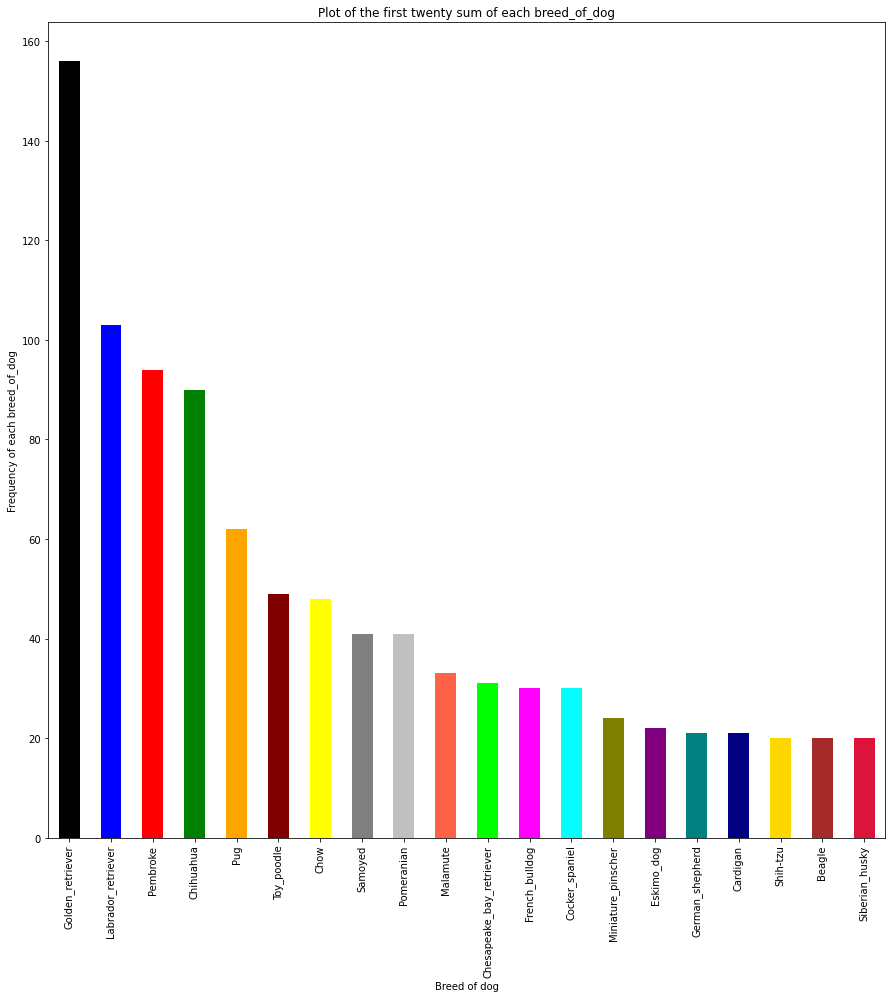

In [272]:
# Defining a function that will be used in plotting
def graph_plots(**kwargs):
    return twitter_archive_master[kwargs['x']].value_counts().head(20).plot(xlabel=kwargs['xlabel'], ylabel=kwargs['ylabel'],
                       title=kwargs['title'], kind=kwargs['kind'], figsize=(15,15), color=['black', 'blue', 'red', 'green', 
                       'orange', 'maroon', 'yellow', 'gray', 'silver', 'tomato', 'lime', 'magenta', 'cyan', 'olive', 'purple', 
                       'teal', 'navy', 'gold', 'brown', 'crimson'])   

graph_plots(x = 'breed_of_dog', title = 'Plot of the first twenty sum of each breed_of_dog',
            xlabel = 'Breed of dog', ylabel = 'Frequency of each breed_of_dog', 
            kind = 'bar'); # Plots the first twenty sum of each breed_of_dog 

#### Research Question 1: Insight #1
The breed of dog with the highest count is 'golden_retriever'.

#### Research Question 2: What is the most popular (that is, used) name (actual name) given to a dog?And list the breeds of dog such name was given to.

In [273]:
# Summing by name
twitter_archive_master['name'].value_counts()

None          479
Cooper         10
Lucy            9
Tucker          9
Charlie         9
             ... 
DonDon          1
Chevy           1
Philbert        1
Rupert          1
Christoper      1
Name: name, Length: 831, dtype: int64

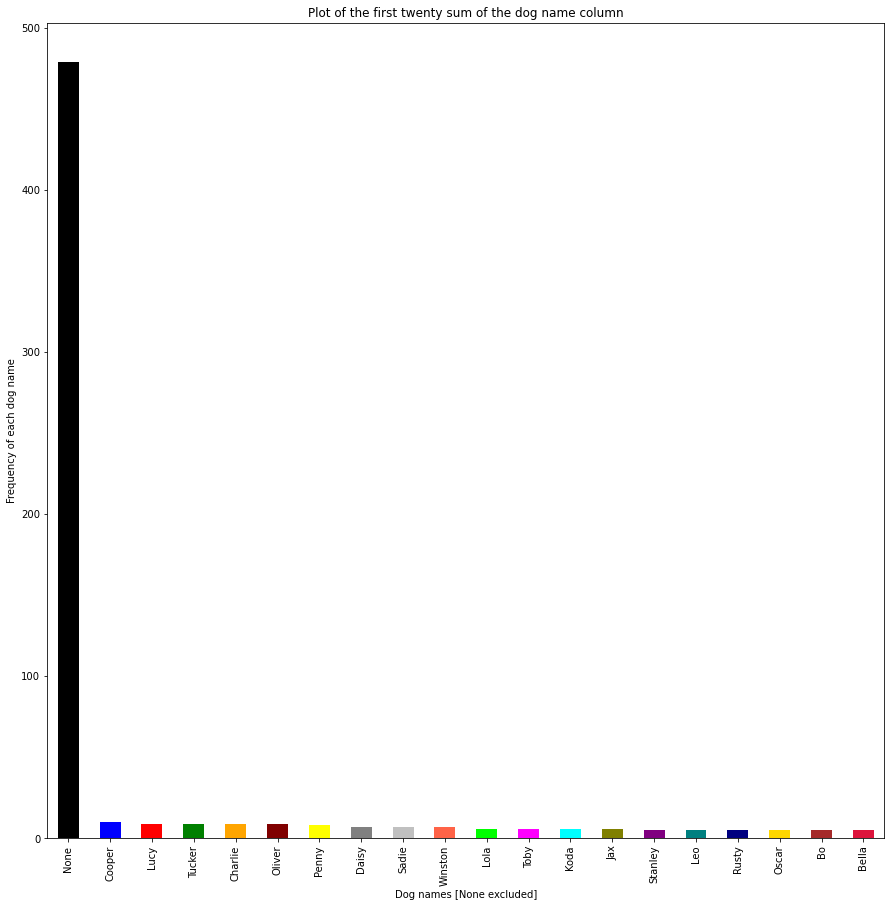

In [274]:
# Plots the first twenty sum of the dog 'name' column 
graph_plots(x = 'name', title = 'Plot of the first twenty sum of the dog name column',
            xlabel = 'Dog names [None excluded]', ylabel = 'Frequency of each dog name', 
            kind = 'bar'); 

In [275]:
# Grouping by the dog name column
dog_name = twitter_archive_master.groupby('name')
dog_name = dog_name.get_group('Cooper')
print(dog_name)          # Prints all the breeds of dog named 'Cooper'

                tweet_id                 timestamp  \
93    868552278524837888 2017-05-27 19:39:34+00:00   
314   814986499976527872 2016-12-31 00:08:17+00:00   
354   808001312164028416 2016-12-11 17:31:39+00:00   
386   798209839306514432 2016-11-14 17:03:50+00:00   
589   757611664640446465 2016-07-25 16:21:11+00:00   
623   751132876104687617 2016-07-07 19:16:47+00:00   
878   708119489313951744 2016-03-11 02:36:57+00:00   
909   705442520700944385 2016-03-03 17:19:38+00:00   
956   699801817392291840 2016-02-17 03:45:29+00:00   
1250  676975532580409345 2015-12-16 04:01:59+00:00   

                                                 source  \
93    <a href="http://twitter.com/download/iphone" r...   
314   <a href="http://twitter.com/download/iphone" r...   
354   <a href="http://twitter.com/download/iphone" r...   
386   <a href="http://twitter.com/download/iphone" r...   
589   <a href="http://twitter.com/download/iphone" r...   
623   <a href="http://twitter.com/download/iphone" 

#### Research Question 2: Insight #2
The name mostly given to a dog is 'Cooper'. And the dog breeds it was given to includes:
1. whippet   
2. dalmatian   
3. Labrador_retriever   
4. Pekinese   
5. bluetick   
6. Labrador_retriever   
7. Norwich_terrier   
8. Great_Pyrenees   
9. golden_retriever   
10. malamute

#### Research Question 3: State the most reoccurring dog stage that is not 'None'.

In [276]:
# Summing by dog_stage
twitter_archive_master['dog_stage'].value_counts()

None        1402
pupper       166
doggo         53
puppo         21
multiple       9
floofer        7
Name: dog_stage, dtype: int64

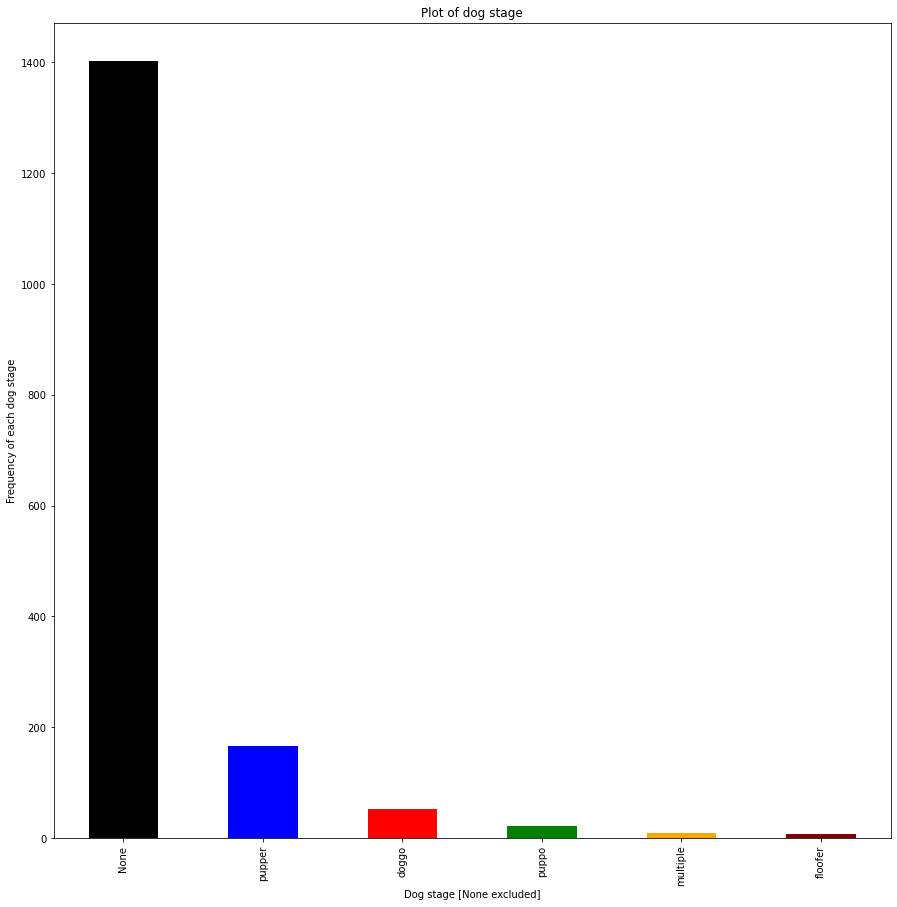

In [277]:
# Plot of dog_stage
graph_plots(x = 'dog_stage', title = 'Plot of dog stage',
            xlabel = 'Dog stage [None excluded]', ylabel = 'Frequency of each dog stage', 
            kind = 'bar'); 

#### Research Question 3: Insight #3
The most reoccurring dog stage is 'pupper'.

<a id='conclusions'></a>
## Conclusions

Information that make up the master dataset (twitter_archive_master) was gathered from three sources: twitter_archive_data (from a downloaded CSV file), image_predictions (downloaded programmatically using Requests library) and additional_twitterdata (by querying twitter API (Application Programming Interface)) which were assessed both visually and programmatically. The master dataset shows that the dog breed 'golden_retriever' was highest by count.And 'Cooper' was a popular dog name given to the various dog breeds while the dog stage 'pupper'was the the most reoccurring amongst the breeds of dog.
    For more refined results, the master dataset will require thorough cleaning.

<a id='limitations'></a>
## Limitations

The analysis of the consolidated dataset (twitter_archive_master) from information gathered from three data sources was done after a limited number of cleaning was carried out. Thus, there are other cleaning the dataset still requires in order to get the holistic picture of it (when carrying out exploratory data analysis).

<a id='references'></a>
## References

[1]

http://www.compciv.org/guides/python/how-tos/downloading-files-with-requests/

[2]

https://www.quora.com/In-Python-how-can-I-save-data-from-a-website-to-CSV-using-BeautifulSoup

[3]

https://www.geeksforgeeks.org/simple-ways-to-read-tsv-files-in-python/

[4]

https://stackoverflow.com/questions/66195254/downloading-a-file-with-a-url-using-python

[5]

https://www.tutorialspoint.com/downloading-files-from-web-using-python

[6]

https://datascienceparichay.com/article/get-data-from-twitter-api-in-python-step-by-step-guide/

[7]

https://openup.org.za/blog/how-to-use-the-twitter-api-to-collect-tweet-data

[8]

https://github.com/gimpeing/data_analysis_projects/tree/master/project_4_wrangle_and_analyze_data

[9]

https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

[10]

https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

[11]

https://stackoverflow.com/questions/68412800/tweeperror-attribute-error-when-using-tweepy

[12]

https://stackoverflow.com/questions/71483397/referencing-cell-in-pandas-dataframe-raises-invalidindexerror

[13]

https://www.easytweaks.com/pandas-replace-column-values/